In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import uproot

from HexDetector import hex_radius_inner_to_outer
from test_functions import *

set_matplotlib_style()

In [2]:
# run_path = '/home/akallits/Documents/PicoAnalysis/Saclay_Analysis/data/2023_April_h4/processedTrees/ParameterTrees/Run243-Pool4_treeParam.root'
# run_path = '/local/home/dn277127/Bureau/picosec/Run243-Pool4_treeParam.root'
run_path = '/home/dylan/Desktop/picosec/Run243-Pool4_treeParam.root'
# run_path = '/data/akallits/Saclay_Analysis/data/data/2023_April_h4/processedTrees/ParameterTrees/Run243-Pool4_treeParam.root'

In [3]:
tree = get_tree(run_path, 'ParameterTree')

In [4]:
event_start, event_end = 4416, None
min_ampl, max_ampl = -2, 2  # V
min_charge, max_charge = -1, 50.0  # fC
min_charge_tot, max_charge_tot = -1, 100.0  # fC

In [5]:
channels = ['C1', 'C2', 'C4']
global_vars = ['eventNo']
channel_vars = ['hitX', 'hitY']
peak_param_channel_vars = ['ampl', 'dampl', 'charge', 'echargefit', 'echargefixed', 'totcharge', 'totchargefixed', 'tfit20','tfit20_nb', 'tnaive20', 'sigmoidR[4]' ]

branches = []
for channel in channels:
    for channel_var in channel_vars:
        branches.append(f'{channel_var}_{channel}')
    for var in peak_param_channel_vars:
        branches.append(f'peakparam_{channel}/peakparam_{channel}.{var}')
for var in global_vars:
    branches.append(var)
df = get_df_branches(tree, branches)

if event_start is not None:
    df = df[df['eventNo'] >= event_start]
if event_end is not None:
    df = df[df['eventNo'] <= event_end]

<Report start=0 stop=30400 source='/home/dylan/Desktop/picosec/Run243-Pool4_treeParam.root:/ParameterTree;1'>


In [6]:
for channel in channels:
    get_single_peak(df, channel)
    # get_single_track(df, channel)
# Get MCP center using all tracks
median_x, median_y = get_center_all_tracks(df, 'C1')
get_closest_track_indices(df, 'C1', (median_x, median_y))

# print(df['closest_hit_index'])

# get_single_track(df, 'C1', np.array(df['closest_hit_index']))
# get_single_track(df, 'C1', 0)
# get_single_track(df, 'C2', 0)
# get_single_track(df, 'C4', 0)



hit_x: [76.14204406738281, 26.117359161376953], hit_y: [45.544525146484375, 29.403099060058594], distances: [2517.19689954   16.12185206], min_idx: 1
hit_x: [22.329296112060547, 24.09388542175293], hit_y: [81.5196762084961, 40.799434661865234], distances: [3004.48045765  214.46052577], min_idx: 1
hit_x: [50.86491394042969, 28.59334945678711], hit_y: [33.65180206298828, 30.87372398376465], distances: [500.35616172  14.44792127], min_idx: 1
hit_x: [73.7822494506836, 30.41176986694336], hit_y: [21.071868896484375, 27.8580265045166], distances: [2.00207313e+03 1.38552951e+00], min_idx: 1
hit_x: [41.39210891723633, 32.26426696777344, 75.01637268066406, 76.54804229736328, 38.90028762817383], hit_y: [38.18463134765625, 35.90861511230469, 20.138553619384766, 15.986964225769043, 43.873294830322266], distances: [ 263.76751702   84.22243641 2125.26292704 2342.81097307  368.14684635], min_idx: 1
hit_x: [72.01624298095703, 30.581205368041992], hit_y: [53.38151168823242, 29.17333984375], distances: 

In [7]:
for channel in channels:
    for xy in ['X', 'Y']:
        col_name = f'hit{xy}_{channel}'
        df[col_name] = df.apply(lambda row: row[col_name][int(row['closest_hit_index'])] if isinstance(row[col_name], list) and ~np.isnan(row['closest_hit_index']) else np.nan, axis=1)


In [8]:
print(df[f'peakparam_C4/peakparam_C4.sigmoidR[4]'])
sigmoidR = df[f'peakparam_C4/peakparam_C4.sigmoidR[4]'][pd.notnull(df['peakparam_C4/peakparam_C4.sigmoidR[4]'])]
print(sigmoidR)
np_sigmoidR = np.array(sigmoidR.tolist())
print(np_sigmoidR)

4416                                                   NaN
4417     [-0.08170317677650336, 204.50103734264457, 4.6...
4418     [-0.04638771289282878, 218.8787739452861, 5.30...
4419                                                   NaN
4420     [-0.08645096359214566, 227.494262115233, 5.053...
                               ...                        
30395                                                  NaN
30396    [-0.21141281487465893, 207.31575423560074, 5.2...
30397    [-0.02988950312537784, 226.35167948237319, 5.7...
30398    [-0.027903222481871777, 222.59003269493763, 6....
30399                                                  NaN
Name: peakparam_C4/peakparam_C4.sigmoidR[4], Length: 25984, dtype: object
4417     [-0.08170317677650336, 204.50103734264457, 4.6...
4418     [-0.04638771289282878, 218.8787739452861, 5.30...
4420     [-0.08645096359214566, 227.494262115233, 5.053...
4422     [-0.018336023770576207, 223.77458232216924, 4....
4423     [-0.08334987252547849, 209.75899

[-0.08170318 -0.04638771 -0.08645096 ... -0.21141281 -0.0298895
 -0.02790322]
[ 0.00019838  0.00029959  0.00011232 ... -0.00018458  0.00011478
 -0.00013179]


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 4.000e+00, 7.000e+00, 8.000e+00, 1.000e+01, 7.000e+00,
        9.000e+00, 7.000e+00, 1.300e+01, 3.100e+01, 2.400e+01, 3.700e+01,
        4.000e+01, 6.700e+01, 1.020e+02, 1.030e+02, 1.630e+02, 2.600e+02,
        4.370e+02, 7.210e+02, 1.680e+03, 5.825e+03, 7.546e+03, 2.305e+03,
        8.700e+02, 4.780e+02, 3.010e+0

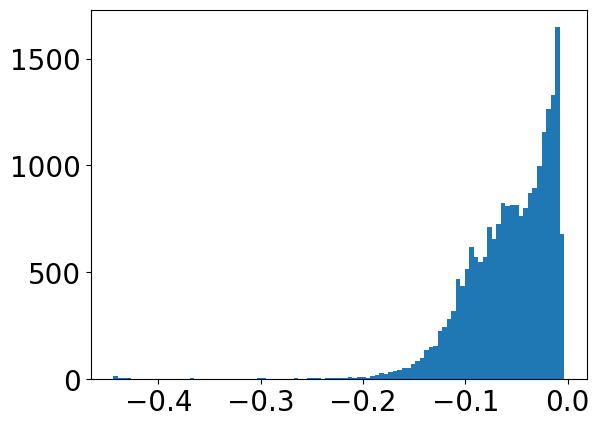

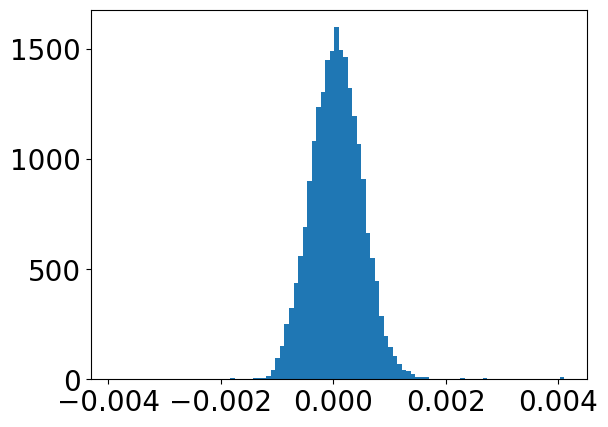

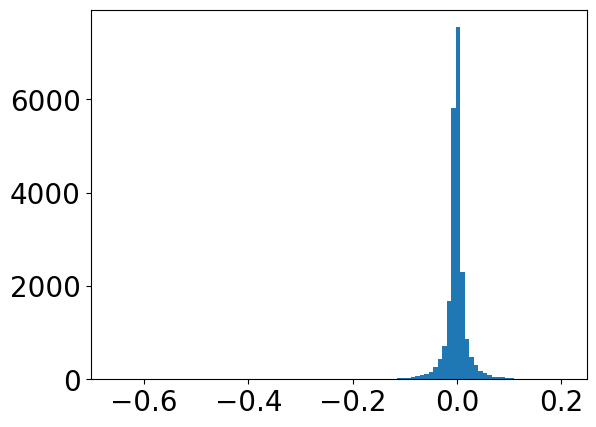

In [9]:
np_sigmoidR = np_sigmoidR[(np_sigmoidR[:, 0] > -999.) & (np_sigmoidR[:, 3] > -999.)]

amplitudes = np_sigmoidR[:, 0]
print(amplitudes)
baselines = np_sigmoidR[:, 3]
print(baselines)

division = baselines/amplitudes

fig, ax = plt.subplots()
ax.hist(amplitudes, bins=100)

fig, ax = plt.subplots()
ax.hist(baselines, bins=100)

fig,ax = plt.subplots()
ax.hist(division, bins=100)

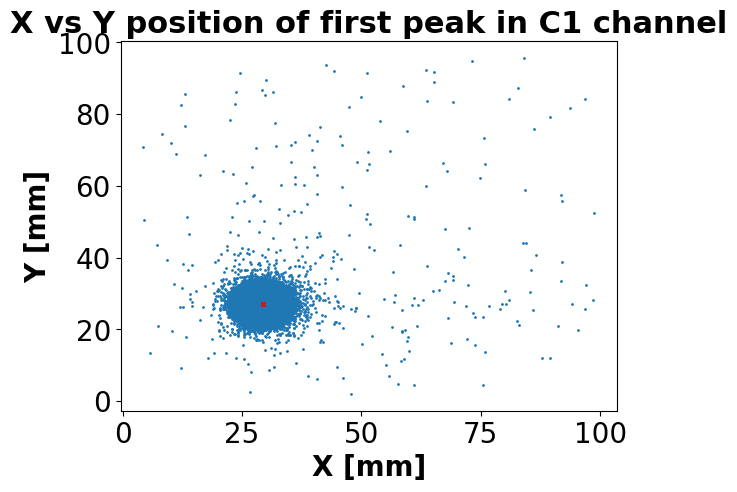

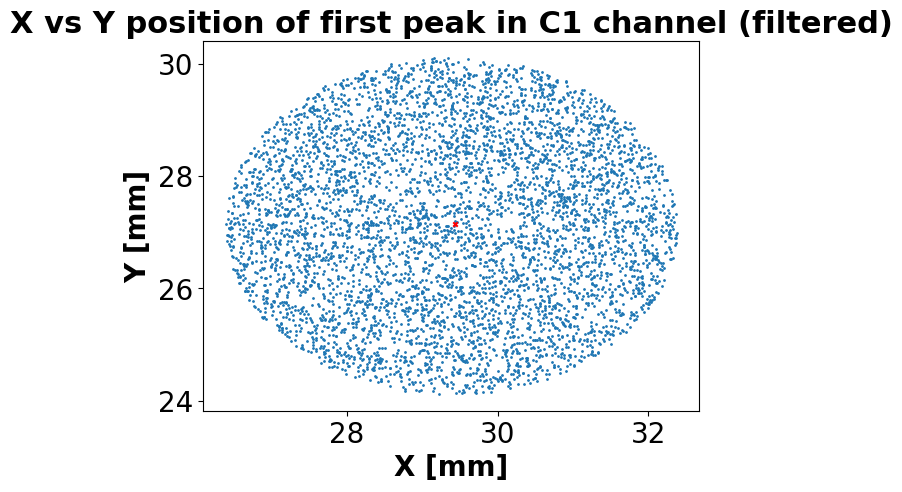

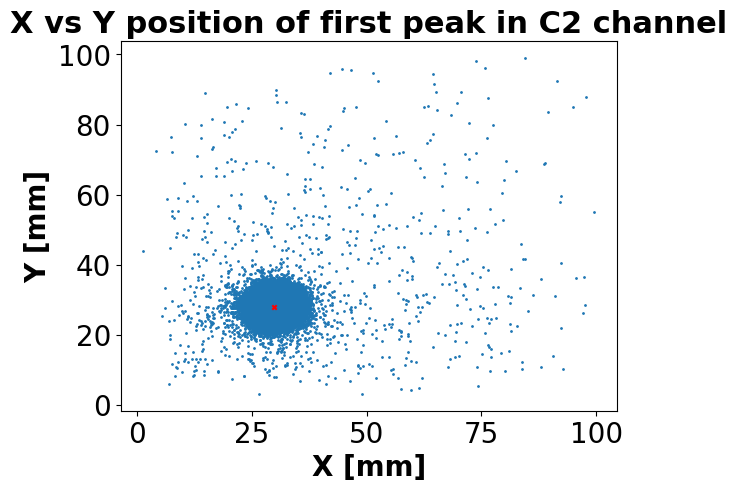

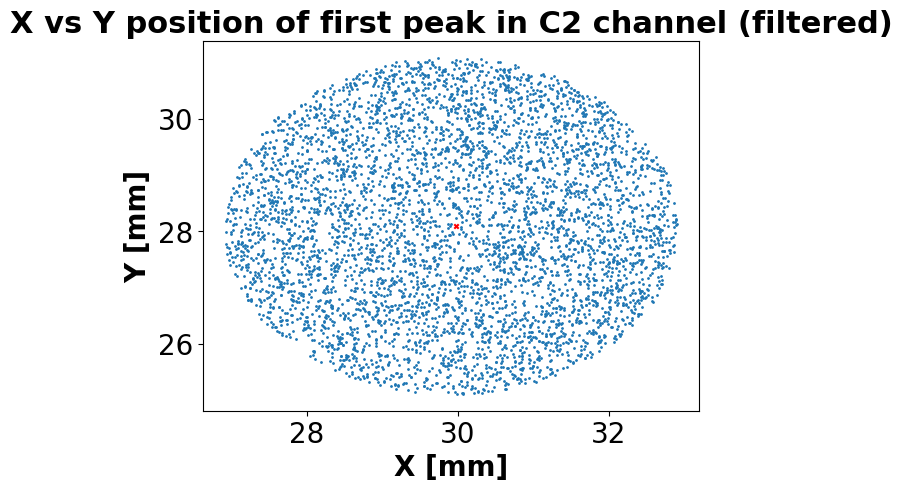

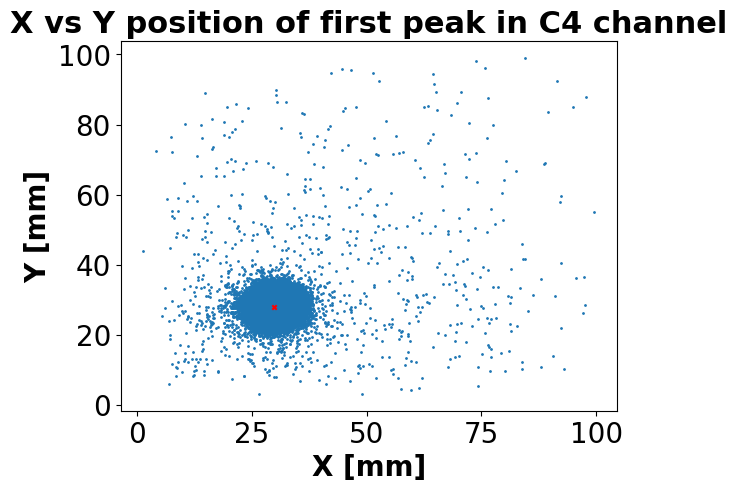

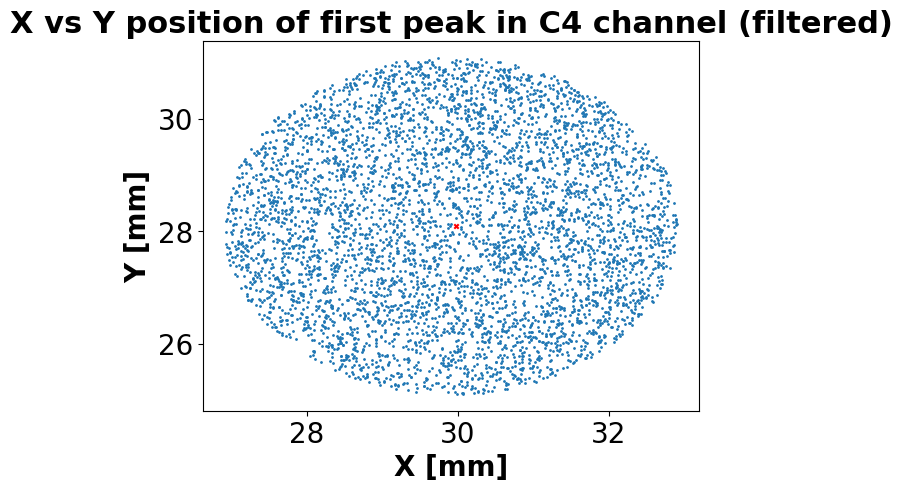

In [10]:
channels = ['C1', 'C2', 'C4']
filter_dict = {}
for channel in channels:
    first_c_xs = df[f'hitX_{channel}']
    first_c_xs = np.array(first_c_xs)
    first_c_ys = df[f'hitY_{channel}']
    first_c_ys = np.array(first_c_ys)

    xy_filter_cut = (first_c_xs > -100) & (first_c_xs < 100) & (first_c_ys > -100) & (first_c_ys < 100)

    first_c_xs_plt = first_c_xs[xy_filter_cut]
    median_x = np.median(first_c_xs_plt)

    first_c_ys_plt = first_c_ys[xy_filter_cut]
    median_y = np.median(first_c_ys_plt)

    fig, ax = plt.subplots()
    ax.scatter(first_c_xs_plt, first_c_ys_plt, s=1)
    ax.scatter(median_x, median_y, s=10, c='red', marker='x')
    ax.set_title(f'X vs Y position of first peak in {channel} channel')
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Y [mm]')

    # Select events within 10 mm of the median
    r = np.sqrt((first_c_xs - median_x)**2 + (first_c_ys - median_y)**2)
    # filter = (1 < r) & (r < 3)
    filter = r < 3
    first_c_xs_filtered = first_c_xs[filter]
    first_c_ys_filtered = first_c_ys[filter]
    median_x = np.median(first_c_xs_filtered)
    median_y = np.median(first_c_ys_filtered)

    filter_dict.update({channel: filter})

    fig, ax = plt.subplots()
    ax.scatter(first_c_xs_filtered, first_c_ys_filtered, s=1)
    ax.scatter(median_x, median_y, s=10, c='red', marker='x')
    ax.set_title(f'X vs Y position of first peak in {channel} channel (filtered)')
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Y [mm]')


plt.show()


C1 Number of outliers: 0 of 25984
C1 Number after filter: 25984 of 25984
C1 channel: min = 0.012497826801337581, max = 0.780148545889383
[False False False ... False False False]
C1 channel: min = 0.014984740229233559, max = 0.779766428866071
C2 Number of outliers: 4 of 25984
C2 Number after filter: 4984 of 25984
C2 channel: min = -1.0577924460996679e-22, max = 0.42080226949588656
[False False False ... False False False]
C2 channel: min = 0.002777777607591749, max = 0.3868782091897199
C4 Number of outliers: 7 of 25984
C4 Number after filter: 21774 of 25984
C4 channel: min = -0.010298717207142425, max = 0.42261918512511293
[False False False ... False False False]
C4 channel: min = 0.0013636051082937977, max = 0.4203664868569451


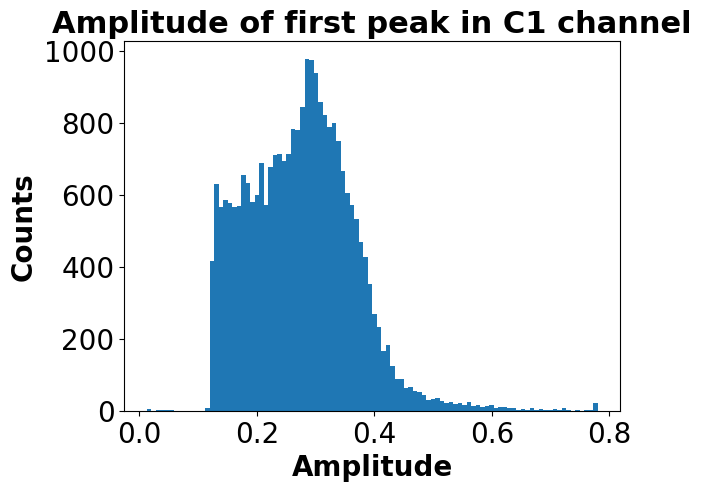

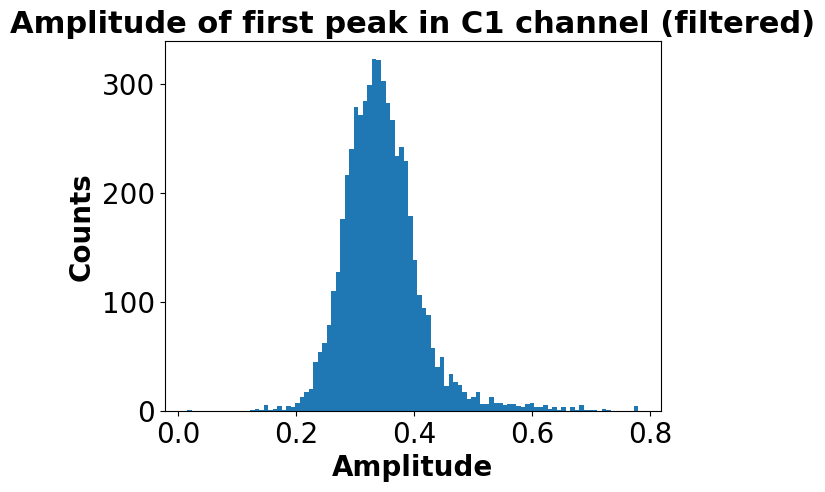

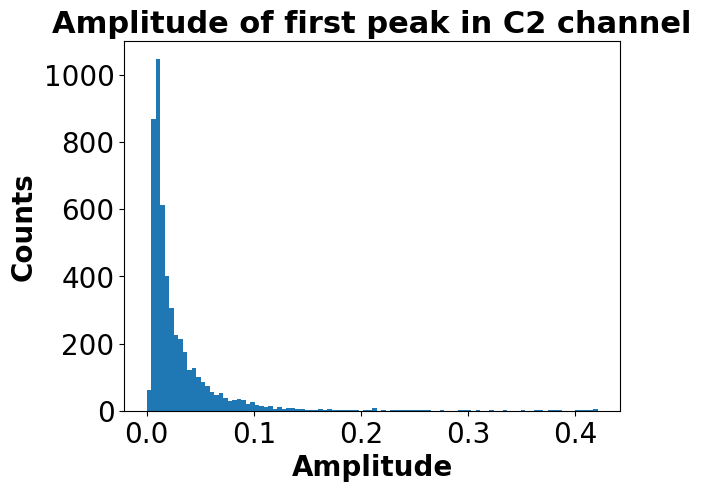

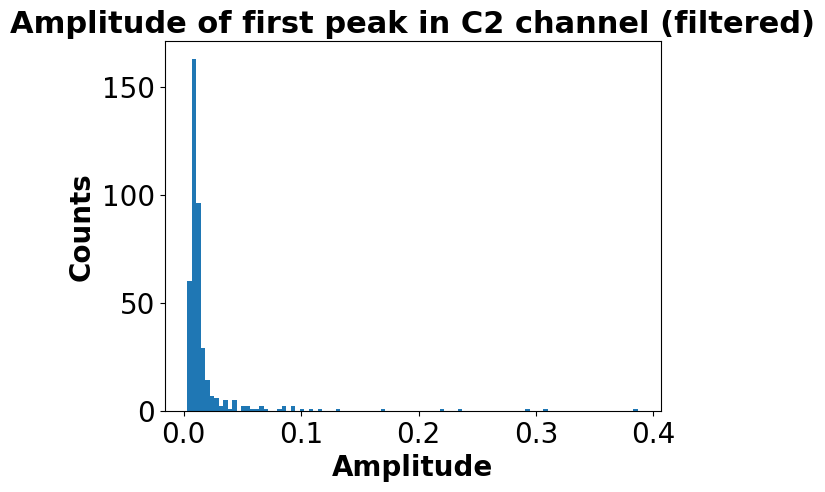

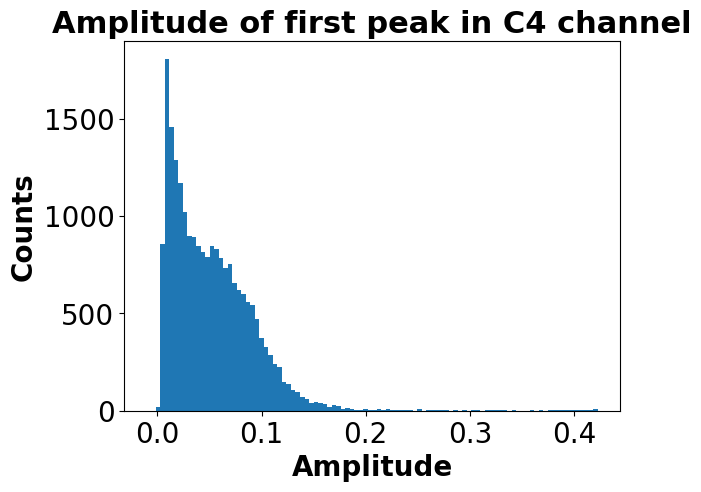

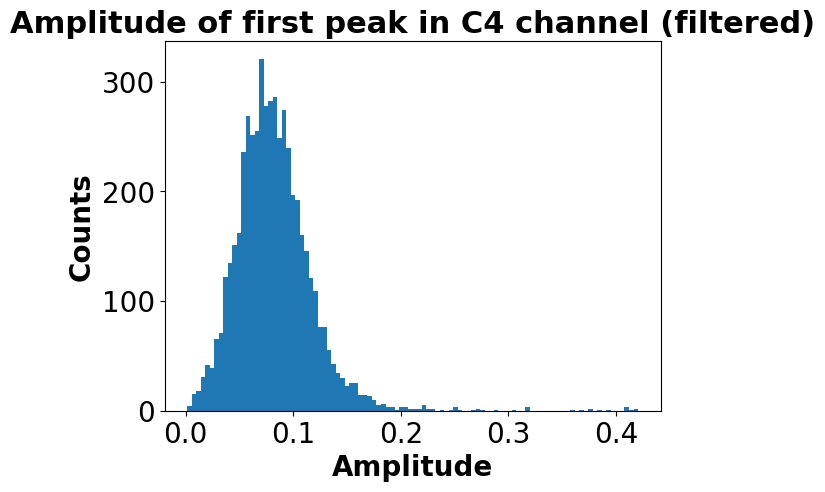

In [11]:
for channel in ['C1', 'C2', 'C4']:
    first_ampls = df[f'peakparam_{channel}/peakparam_{channel}.ampl']
    df[f'peakparam_{channel}/peakparam_{channel}.ampl_filtered'] = first_ampls.apply(lambda x: x if (x > min_ampl) & (x < max_ampl) else np.nan)
    first_ampls = np.array(first_ampls)
    first_ampls_filtered = first_ampls[(first_ampls > min_ampl) & (first_ampls < max_ampl)]
    first_ampls_outliers = first_ampls[(first_ampls < min_ampl) | (first_ampls > max_ampl)]
    # Update the dataframe with the filtered amplitudes

    print(f'{channel} Number of outliers: {len(first_ampls_outliers)} of {len(first_ampls)}')
    print(f'{channel} Number after filter: {len(first_ampls_filtered)} of {len(first_ampls)}')
    #plot each channels amplitude in a histogram
    #print range of amplitudes
    print(f'{channel} channel: min = {np.nanmin(first_ampls_filtered)}, max = {np.nanmax(first_ampls_filtered)}')
    fig, ax = plt.subplots()
    ax.hist(first_ampls_filtered, bins=100)
    ax.set_title(f'Amplitude of first peak in {channel} channel')
    ax.set_xlabel('Amplitude')
    ax.set_ylabel('Counts')

    print(filter_dict[channel])
    filtered_first_ampls = first_ampls[filter_dict[channel]]
    filtered_first_ampls = filtered_first_ampls[(filtered_first_ampls > min_ampl) & (filtered_first_ampls < max_ampl)]
    print(f'{channel} channel: min = {np.nanmin(filtered_first_ampls)}, max = {np.nanmax(filtered_first_ampls)}')
    fig, ax = plt.subplots()
    ax.hist(filtered_first_ampls, bins=100)
    ax.set_title(f'Amplitude of first peak in {channel} channel (filtered)')
    ax.set_xlabel('Amplitude')
    ax.set_ylabel('Counts')
plt.show()


C1 Number of outliers: 25984 of 25984
C2 Number of outliers: 1 of 25984
C2 channel: min = 0.004009692519903183, max = 0.386275645699352
C4 Number of outliers: 2 of 25984
C4 channel: min = 0.004107646364718673, max = 0.3864324754104018


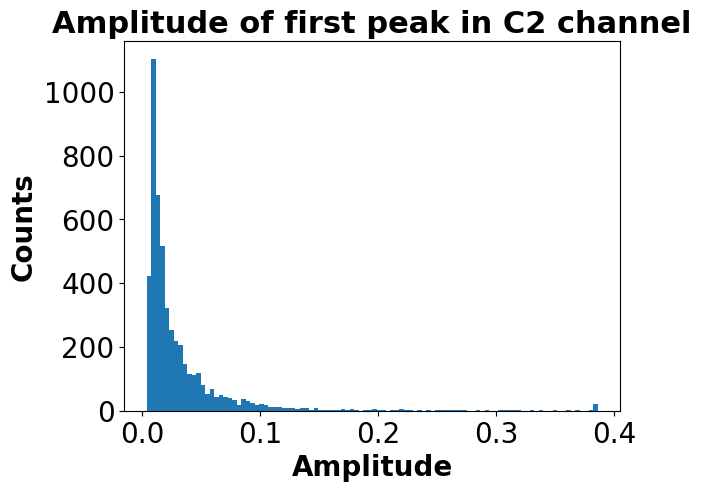

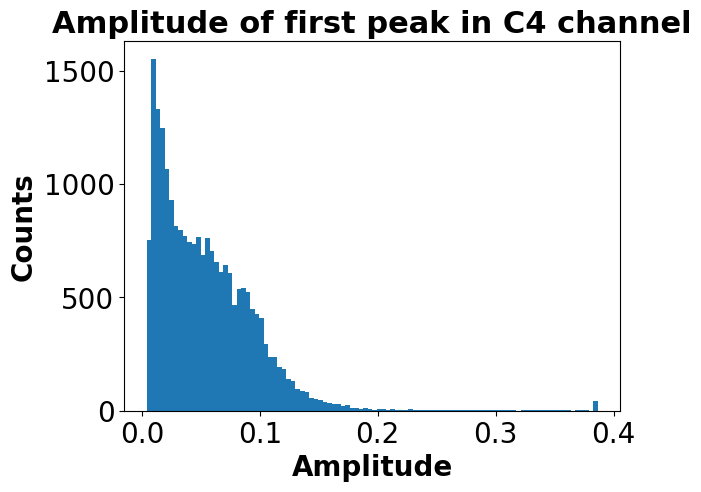

In [12]:
for channel in ['C1', 'C2', 'C4']:
    first_dampls = df[f'peakparam_{channel}/peakparam_{channel}.dampl']

    df[f'peakparam_{channel}/peakparam_{channel}.dampl_filtered'] = first_dampls.apply(lambda x: x if (x > min_ampl) & (x < max_ampl) else np.nan)
    first_dampls = np.array(first_dampls)
    first_dampls_filtered = first_dampls[(first_dampls > min_ampl) & (first_dampls < max_ampl)]
    first_dampls_outliers = first_dampls[(first_dampls < min_ampl) | (first_dampls > max_ampl)]
    print(f'{channel} Number of outliers: {len(first_dampls_outliers)} of {len(first_dampls)}')

    #plot each channels amplitude in a histogram
    #print range of amplitudes
    if len(first_dampls_filtered) <= 0: continue
    print(f'{channel} channel: min = {np.nanmin(first_dampls_filtered)}, max = {np.nanmax(first_dampls_filtered)}')
    fig, ax = plt.subplots()
    ax.hist(first_dampls_filtered, bins=100)
    ax.set_title(f'Amplitude of first peak in {channel} channel')
    ax.set_xlabel('Amplitude')
    ax.set_ylabel('Counts')
plt.show()

In [13]:
print(df.head())

        hitX_C1    hitY_C1  peakparam_C1/peakparam_C1.ampl  \
4416  35.293076  28.785038                        0.191332   
4417  25.653530  28.127159                        0.311535   
4418  26.117359  29.403099                        0.319465   
4419        NaN        NaN                        0.301462   
4420  31.524521  25.177364                        0.273322   

      peakparam_C1/peakparam_C1.dampl  peakparam_C1/peakparam_C1.charge  \
4416                           -999.0                          0.133860   
4417                           -999.0                          0.203303   
4418                           -999.0                          0.219874   
4419                           -999.0                          0.211156   
4420                           -999.0                          0.186704   

      peakparam_C1/peakparam_C1.echargefit  \
4416                               -9999.0   
4417                               -9999.0   
4418                               -99

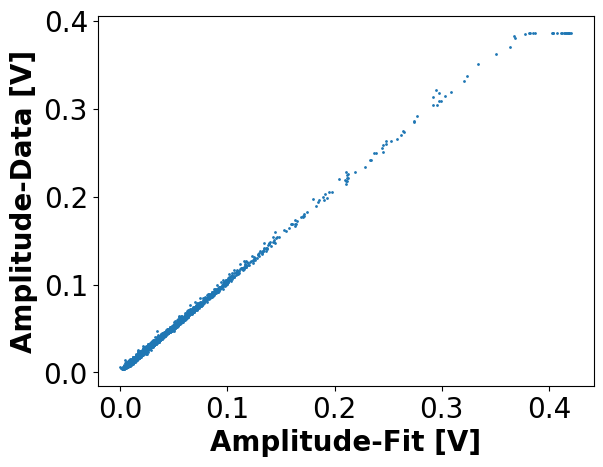

In [14]:
#correlation plot of amplitudes and damplitudes for channel C2 and C4
fig, ax = plt.subplots()
ax.scatter(df['peakparam_C2/peakparam_C2.ampl_filtered'], df['peakparam_C2/peakparam_C2.dampl_filtered'], s=1)
ax.set_title('')
ax.set_xlabel('Amplitude-Fit [V]')
ax.set_ylabel('Amplitude-Data [V]')
plt.show()

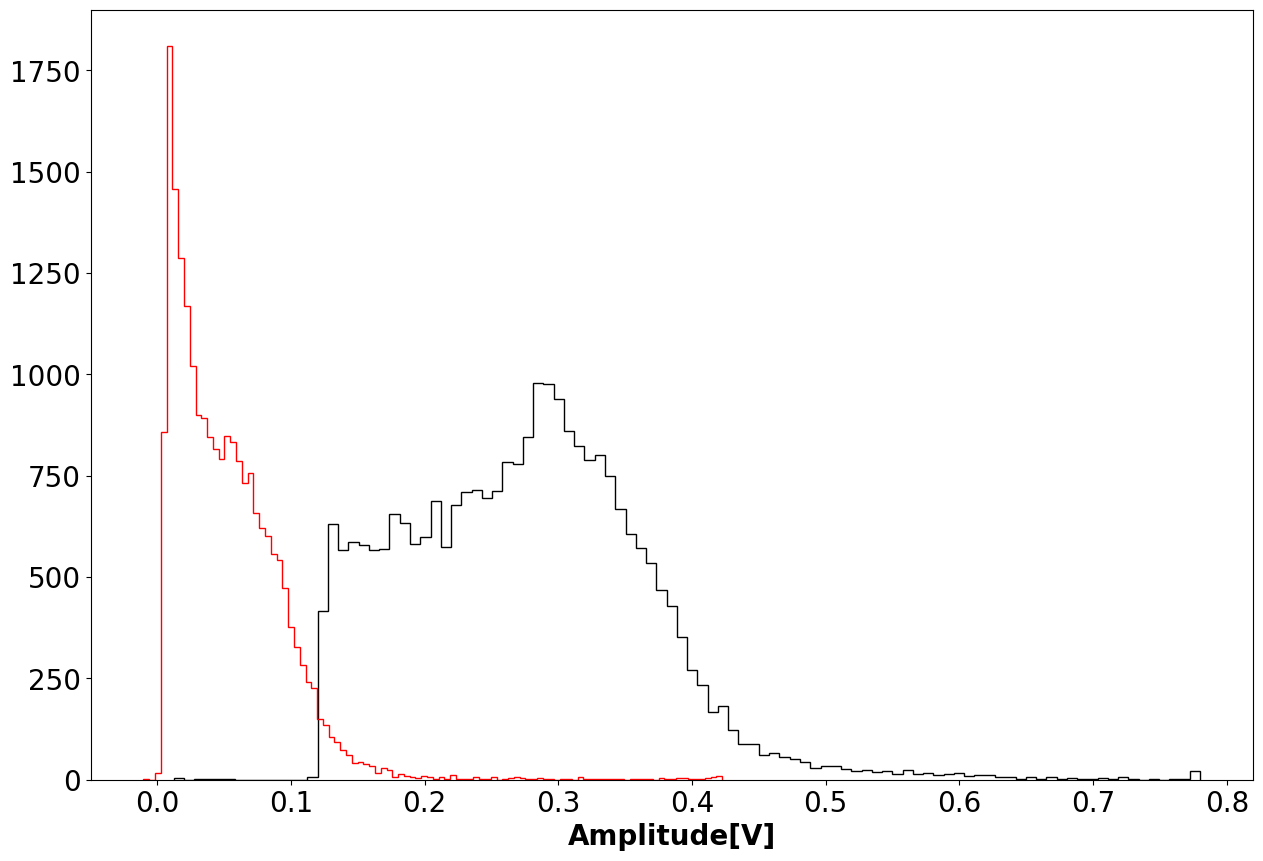

In [15]:
#make a plot with c1 and c4 amplitudes at the same graph
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(df['peakparam_C1/peakparam_C1.ampl_filtered'], bins=100, histtype='step', color='black', lw=2, label=f'MCP-1')
ax.hist(df['peakparam_C4/peakparam_C4.ampl_filtered'], bins=100, histtype='step', color='red', lw=2, label=f'MM-pad0')
ax.set_title('')
ax.set_xlabel('Amplitude[V]')
ax.set_ylabel('')
plt.show()


C1 Number of outliers: 0 of 25984
C1 Number after filter: 25984 of 25984
C1 channel: min = 0.0067010960068495315, max = 1.1877907654227633
C2 Number of outliers: 4 of 25984
C2 Number after filter: 4984 of 25984
C2 channel: min = -0.07169024845375609, max = 19.762735262968327
C4 Number of outliers: 9 of 25984
C4 Number after filter: 21772 of 25984
C4 channel: min = -0.22741424318318434, max = 31.724111593823345


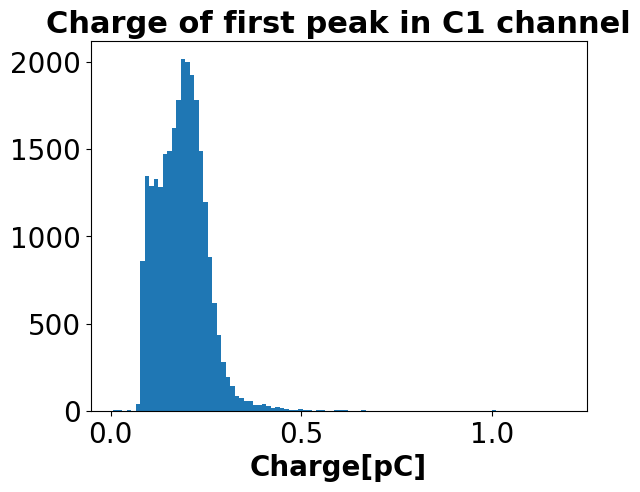

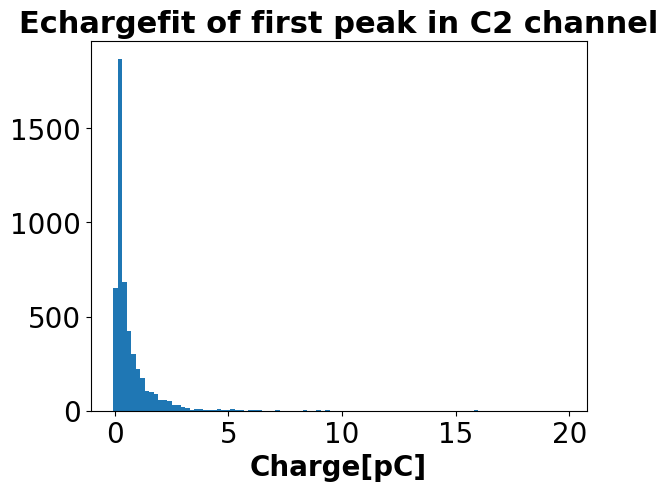

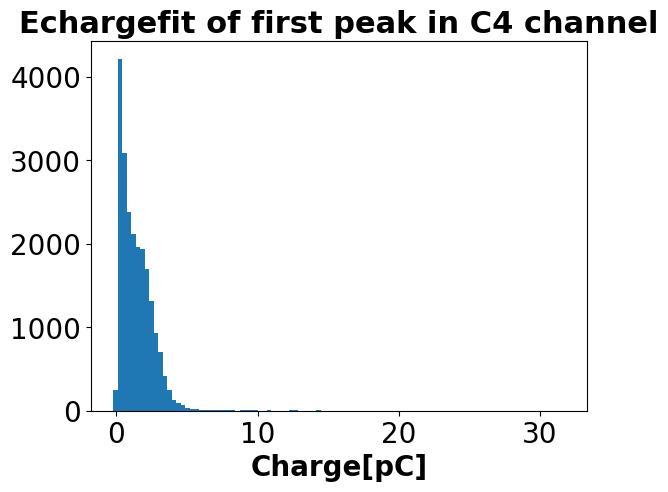

In [16]:
for channel in ['C1','C2', 'C4']:
    if channel == 'C1':
        first_charges = df[f'peakparam_{channel}/peakparam_{channel}.charge']
        df[f'peakparam_{channel}/peakparam_{channel}.charge_filtered'] = first_charges.apply(lambda x: x if (x > min_charge) & (x < max_charge) else np.nan)
        first_charges = np.array(first_charges)
        first_charges_filtered = first_charges[(first_charges > min_charge) & (first_charges < max_charge)]
        first_charges_outliers = first_charges[(first_charges< min_charge) | (first_charges > max_charge)]
    else:
        first_charges = df[f'peakparam_{channel}/peakparam_{channel}.echargefit']
        df[f'peakparam_{channel}/peakparam_{channel}.echargefit_filtered'] = first_charges.apply(lambda x: x if (x > min_charge) & (x < max_charge) else np.nan)

        first_charges = np.array(first_charges)
        first_charges_filtered = first_charges[(first_charges > min_charge) & (first_charges < max_charge)]
        first_charges_outliers = first_charges[(first_charges< min_charge) | (first_charges > max_charge)]
    # Update the dataframe with the filtered amplitudes

    print(f'{channel} Number of outliers: {len(first_charges_outliers)} of {len(first_charges)}')
    print(f'{channel} Number after filter: {len(first_charges_filtered)} of {len(first_charges)}')
    #plot each channels amplitude in a histogram
    #print range of amplitudes
    print(f'{channel} channel: min = {np.nanmin(first_charges_filtered)}, max = {np.nanmax(first_charges_filtered)}')
    fig, ax = plt.subplots()
    ax.hist(first_charges_filtered, bins=100)
    if channel == 'C1':
        ax.set_title(f'Charge of first peak in {channel} channel')
    else:
        ax.set_title(f'Echargefit of first peak in {channel} channel')
    ax.set_xlabel('Charge[pC]')
    ax.set_ylabel('')
plt.show()

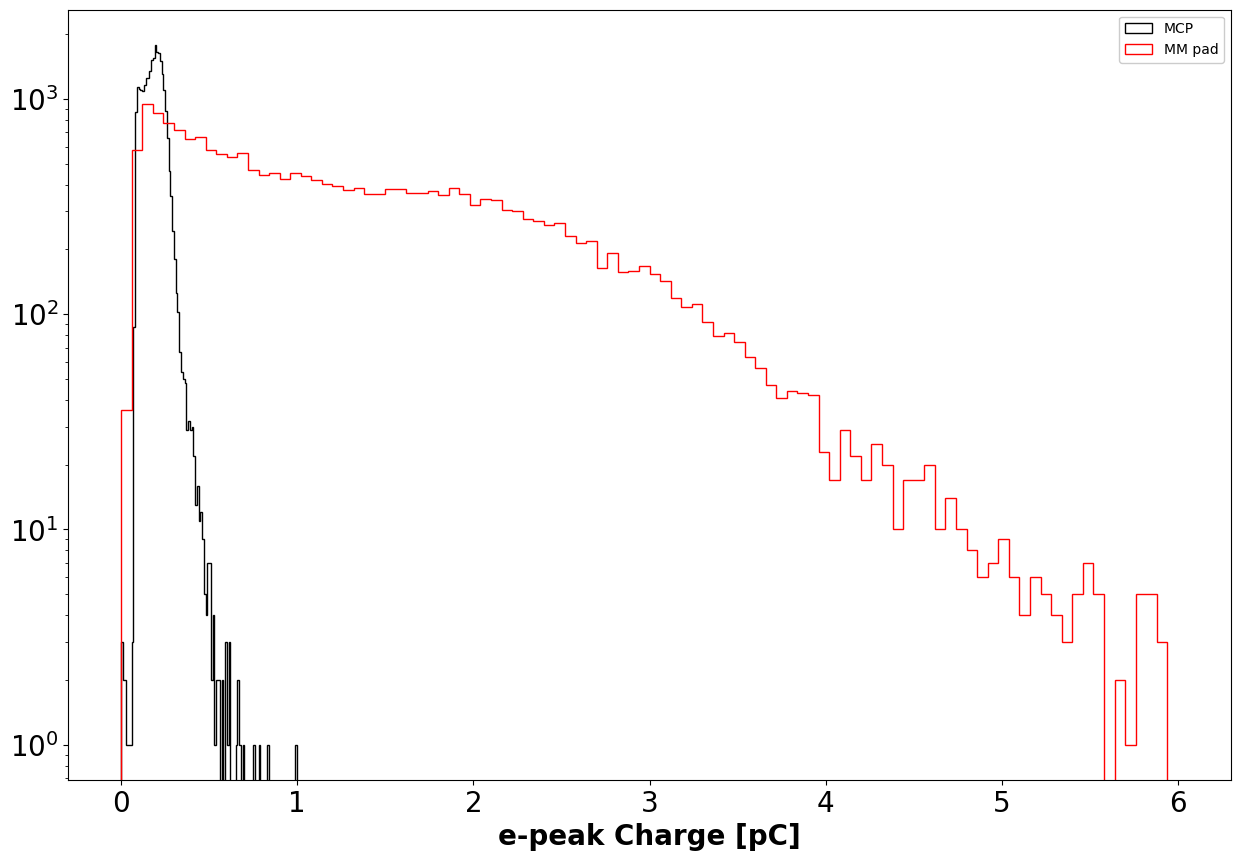

In [17]:
fig, axs = plt.subplots(figsize=(15, 10))
#for i in range(len(mcp_qs)):
axs.hist(df[f'peakparam_C1/peakparam_C1.charge_filtered'], bins=100, range=(0.0, 1.0), histtype='step', color='black', lw=2, label=f'MCP')
axs.hist(df[f'peakparam_C4/peakparam_C4.echargefit_filtered'], bins=100, range=(0.0, 6.0), histtype='step', color='red', lw=2, label=f'MM pad')
axs.set_yscale('log')
axs.set_xlabel('e-peak Charge [pC]')
axs.set_title('')
axs.legend()
plt.show()

C1 Number of outliers: 0 of 25984
C1 Number after filter: 25984 of 25984
C1 channel: min = 0.0067010960068495315, max = 1.1877907654227633
C2 Number of outliers: 5 of 25984
C2 Number after filter: 4983 of 25984
C2 channel: min = 0.13149981795361282, max = 97.66794550557336
C4 Number of outliers: 11 of 25984
C4 Number after filter: 21770 of 25984
C4 channel: min = 0.20159773797738173, max = 95.33508035433051


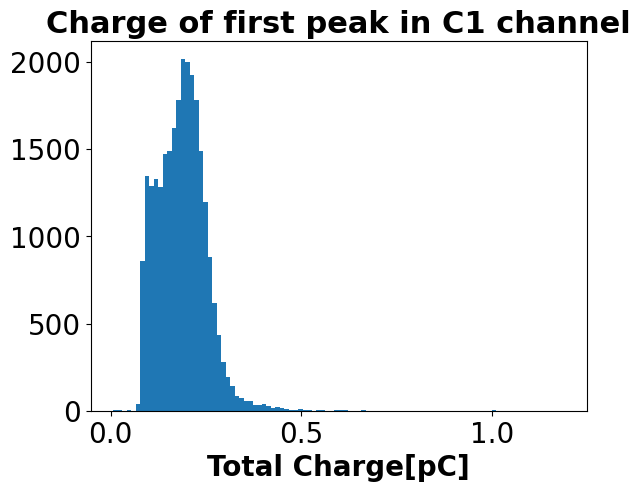

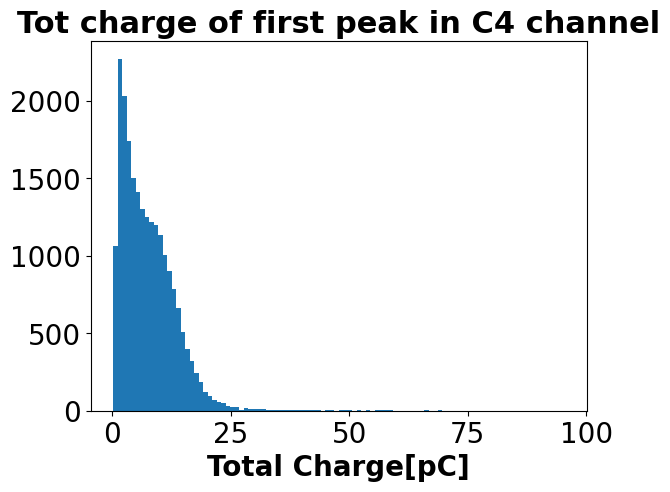

In [18]:
for channel in ['C1','C2', 'C4']:
    if channel == 'C1':
        first_charges = df[f'peakparam_{channel}/peakparam_{channel}.charge']
        df[f'peakparam_{channel}/peakparam_{channel}.charge_filtered'] = first_charges.apply(lambda x: x if (x > min_charge_tot) & (x < max_charge_tot) else np.nan)
        first_charges = np.array(first_charges)
        first_charges_filtered = first_charges[(first_charges > min_charge_tot) & (first_charges < max_charge_tot)]
        first_charges_outliers = first_charges[(first_charges< min_charge_tot) | (first_charges > max_charge_tot)]
    else:
        first_charges = df[f'peakparam_{channel}/peakparam_{channel}.totcharge']
        df[f'peakparam_{channel}/peakparam_{channel}.totcharge_filtered'] = first_charges.apply(lambda x: x if (x > min_charge_tot) & (x < max_charge_tot) else np.nan)

        first_charges = np.array(first_charges)
        first_charges_filtered = first_charges[(first_charges > min_charge_tot) & (first_charges < max_charge_tot)]
        first_charges_outliers = first_charges[(first_charges< min_charge_tot) | (first_charges > max_charge_tot)]
    # Update the dataframe with the filtered amplitudes

    print(f'{channel} Number of outliers: {len(first_charges_outliers)} of {len(first_charges)}')
    print(f'{channel} Number after filter: {len(first_charges_filtered)} of {len(first_charges)}')
    #plot each channels amplitude in a histogram
    #print range of amplitudes
    print(f'{channel} channel: min = {np.nanmin(first_charges_filtered)}, max = {np.nanmax(first_charges_filtered)}')
    fig, ax = plt.subplots()
    ax.hist(first_charges_filtered, bins=100)
    if channel == 'C1':
        ax.set_title(f'Charge of first peak in {channel} channel')
    else:
        ax.set_title(f'Tot charge of first peak in {channel} channel')
    ax.set_xlabel('Total Charge[pC]')
    ax.set_ylabel('')
plt.show()

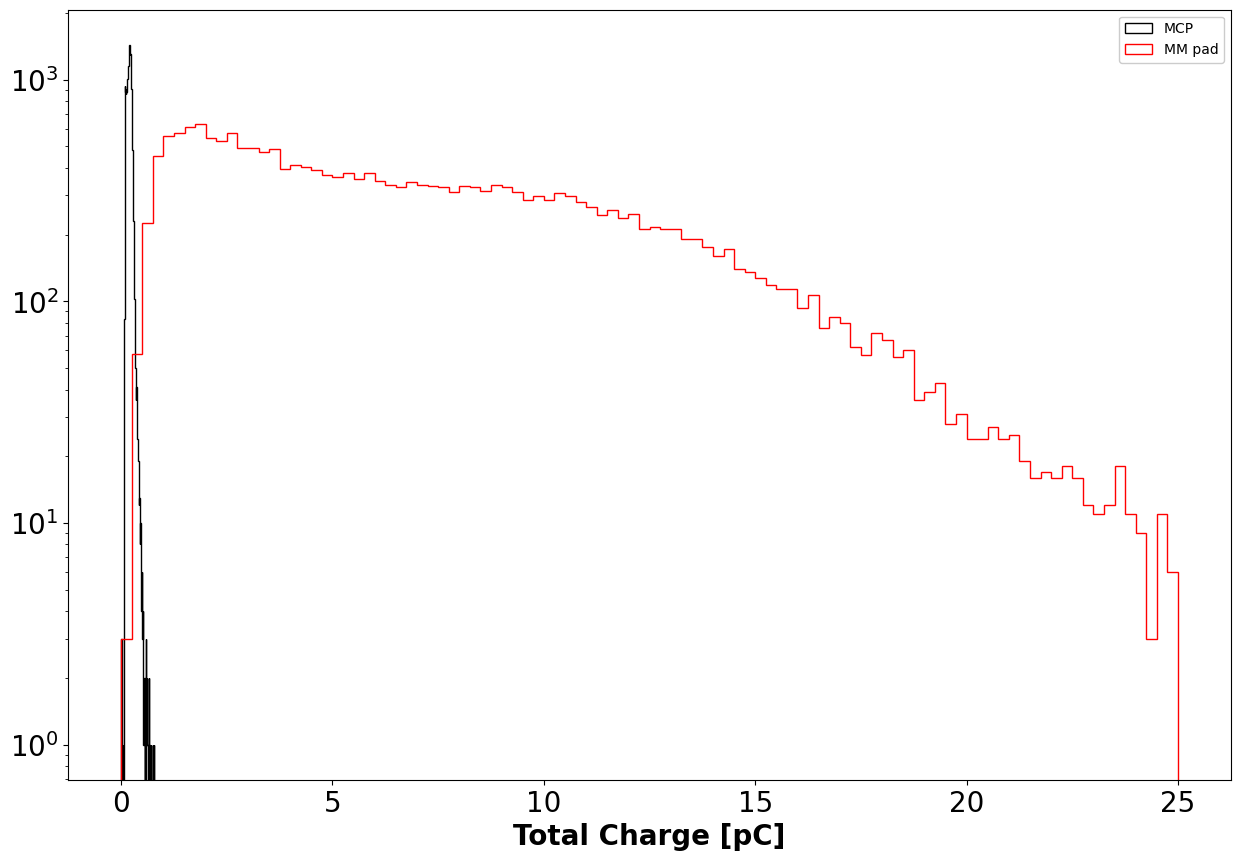

In [19]:
fig, axs = plt.subplots(figsize=(15, 10))
#for i in range(len(mcp_qs)):
axs.hist(df[f'peakparam_C1/peakparam_C1.charge_filtered'], bins=100, range=(0.0, 0.8), histtype='step', color='black', lw=2, label=f'MCP')
axs.hist(df[f'peakparam_C4/peakparam_C4.totcharge_filtered'], bins=100, range=(0.0, 25.0), histtype='step', color='red', lw=2, label=f'MM pad')
axs.set_yscale('log')
axs.set_xlabel('Total Charge [pC]')
axs.set_title('')
axs.legend()
plt.show()

In [20]:
fig, axs = plt.subplots(figsize=(15, 10))

def line(x, a, b):
    return a*x + b

x = df[f'peakparam_C4/peakparam_C4.ampl_filtered']
y = df[f'peakparam_C4/peakparam_C4.echargefit_filtered']

up_slope, up_offset = 30, 0.2
up_rejects_filter = y > line(x, up_slope, up_offset)
up_rejects_x = x[up_rejects_filter]
up_rejects_y = y[up_rejects_filter]

up_rejects_df = df[up_rejects_filter]
print('Up Rejects:')
print(up_rejects_df.head())

#for i in range(len(mm_vs)):
axs.scatter(df[f'peakparam_C4/peakparam_C4.ampl_filtered'], df[f'peakparam_C4/peakparam_C4.echargefit_filtered'], s=0.6, color='black', label=f'MM Pad')
axs.scatter(up_rejects_x, up_rejects_y, s=2, color='blue', label=f'Rejects')
axs.plot(np.array(df[f'peakparam_C4/peakparam_C4.ampl_filtered']), line(np.array(df[f'peakparam_C4/peakparam_C4.ampl_filtered']), 30, 0.2), color='red', label='y=x')
axs.plot(df[f'peakparam_C4/peakparam_C4.ampl_filtered'], line(df[f'peakparam_C4/peakparam_C4.ampl_filtered'], 30, -0.8), color='red', label='y=x')

axs.set_xlabel('Amplitude [V]')
axs.set_ylabel('e-peak Charge [pC]')
axs.set_xlim(0, 0.18)
axs.set_ylim(0, 10)
axs.legend()

plt.show()

Up Rejects:
        hitX_C1    hitY_C1  peakparam_C1/peakparam_C1.ampl  \
4444  27.797491  23.943296                        0.458306   
4492  24.579620  28.040747                        0.237517   
4504  34.008106  24.337193                        0.306263   
4517  28.840000  27.333103                        0.371106   
4521  28.431326  20.973377                        0.147619   

      peakparam_C1/peakparam_C1.dampl  peakparam_C1/peakparam_C1.charge  \
4444                           -999.0                          0.317773   
4492                           -999.0                          0.161774   
4504                           -999.0                          0.204402   
4517                           -999.0                          0.244336   
4521                           -999.0                          0.102539   

      peakparam_C1/peakparam_C1.echargefit  \
4444                               -9999.0   
4492                               -9999.0   
4504                      

In [21]:
fig, axs = plt.subplots(figsize=(15, 10))

#for i in range(len(mm_vs)):
axs.scatter(df[f'peakparam_C4/peakparam_C4.ampl_filtered'], df[f'peakparam_C4/peakparam_C4.totcharge_filtered'], s=0.6, color='black', label=f'MM Pad')

axs.set_xlabel('Amplitude [V]')
axs.set_ylabel('e-peak Charge [pC]')
axs.set_xlim(0, 0.18)
axs.set_ylim(0, 60)
axs.legend()

plt.show()

In [22]:
fig, axs = plt.subplots(figsize=(15, 10))

#for i in range(len(mm_vs)):
axs.scatter(df[f'peakparam_C4/peakparam_C4.echargefit_filtered'], df[f'peakparam_C4/peakparam_C4.totcharge_filtered'], s=0.6, color='black', label=f'MM Pad')

axs.set_xlabel('Total charge [pC]')
axs.set_ylabel('e-peak Charge [pC]')
axs.set_xlim(0, 20)
axs.set_ylim(0, 60)
axs.legend()

plt.show()

(None, None)

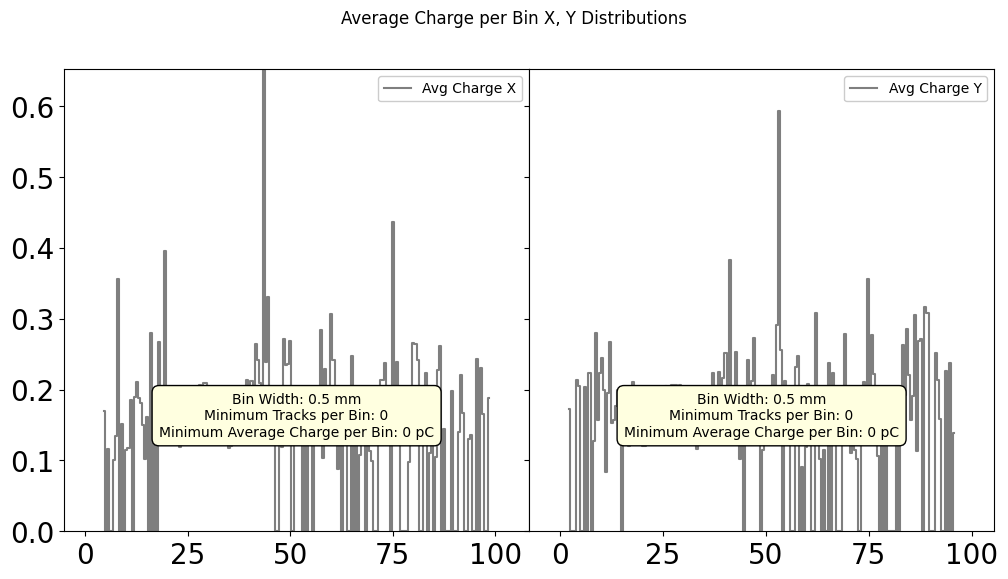

In [23]:
get_pad_center(df, 'C1', plot=True, charge_col_name='charge_filtered', charge_cut_low=0, charge_cut_high=2, min_tracks_per_2d_bin=0, min_avg_charge_per_2d_bin=0, plot_only=True)

C1 Pad Center: (29.036 ± 0.060, 26.967 ± 0.057)


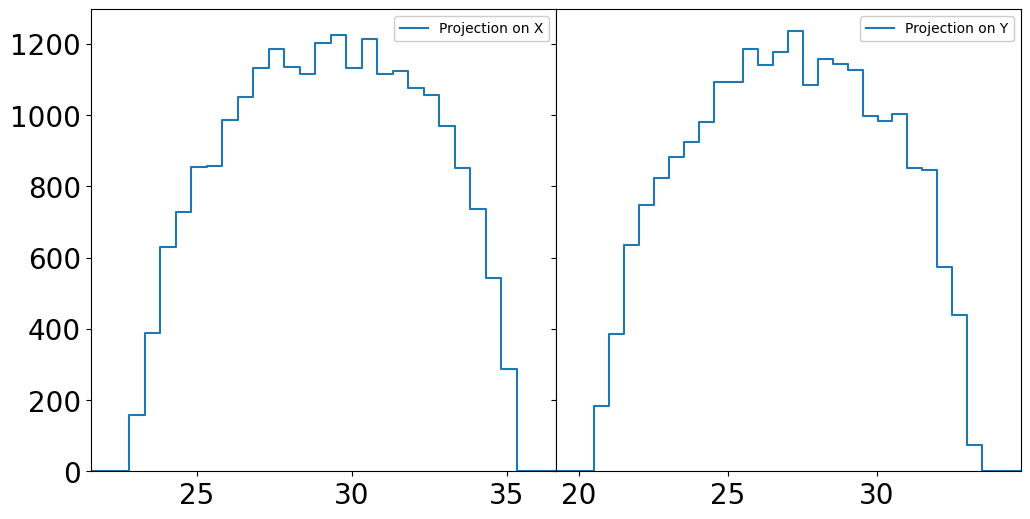

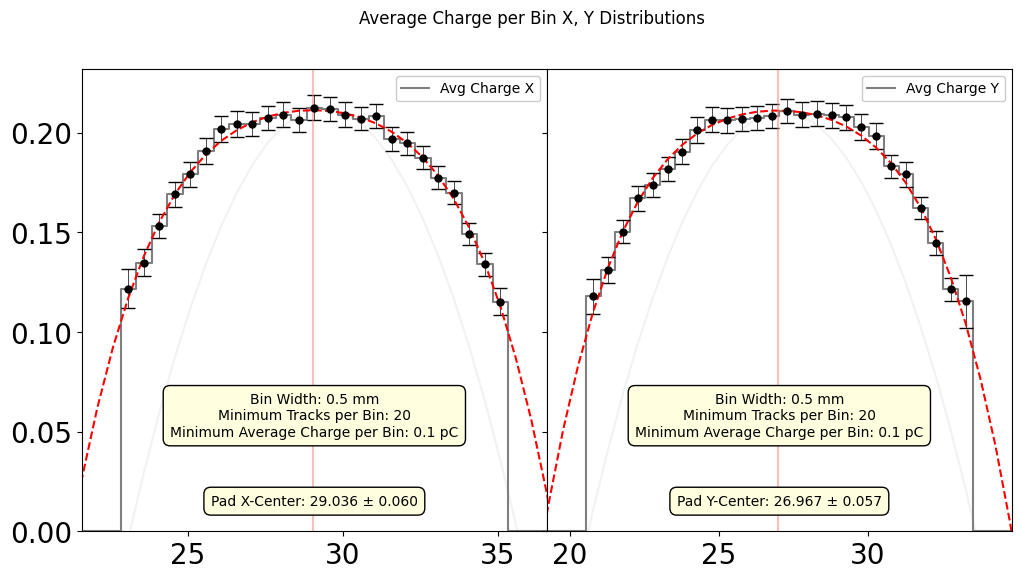

In [24]:
c1_pad_center_measures = get_pad_center(df, 'C1', plot=True, charge_col_name='charge_filtered', charge_cut_low=0, charge_cut_high=2, min_avg_charge_per_2d_bin=0.1)
print(f'C1 Pad Center: ({", ".join([str(xi) for xi in c1_pad_center_measures])})')

In [25]:
get_pad_center(df, 'C4', plot=True, charge_cut_low=0, charge_cut_high=100, min_tracks_per_2d_bin=0, min_avg_charge_per_2d_bin=0, plot_only=True)

(None, None)

C4 Pad Center: (29.138 ± 0.042, 26.619 ± 0.049)


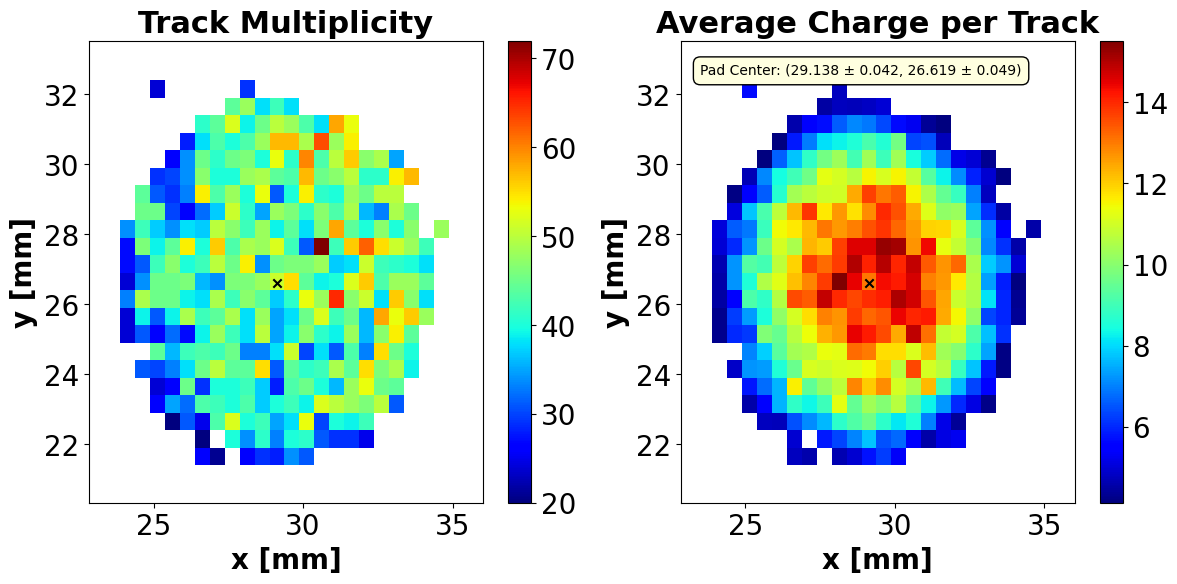

In [26]:
c4_pad_center_measures = get_pad_center(df, 'C4', plot=True, charge_cut_low=0, charge_cut_high=100)
print(f'C4 Pad Center: ({", ".join([str(xi) for xi in c4_pad_center_measures])})')

In [27]:
mm_basic_charge_cut = (0.2 < df['peakparam_C4/peakparam_C4.totcharge_filtered']) & (df['peakparam_C4/peakparam_C4.totcharge_filtered'] < 100)
mcp_basic_charge_cut = (0 < df['peakparam_C1/peakparam_C1.charge_filtered']) & (df['peakparam_C1/peakparam_C1.charge_filtered'] < 2)
good_mm_mcp_charge_events = mm_basic_charge_cut & mcp_basic_charge_cut
xs = df['hitX_C4'][good_mm_mcp_charge_events]
ys = df['hitY_C4'][good_mm_mcp_charge_events]
rs = np.sqrt((xs - c4_pad_center_measures[0].val)**2 + (ys - c4_pad_center_measures[1].val)**2)
charges_all = df['peakparam_C4/peakparam_C4.totcharge_filtered'][good_mm_mcp_charge_events]

print(f'charges_all.shape: {charges_all.shape}')

charges_all.shape: (21770,)


n_event_bins: 217
gaus_bin_hist failed for bin 1.07 pC to 1.164950 pC
69 points in the last bin


/home/dylan/PycharmProjects/pico_py_analysis/single_pad_analysis/test_functions.py:376: RuntimeWarning: overflow encountered in exp
  return a1 * np.exp(l1 * x) + a2 * np.exp(l2 * x) + c
/home/dylan/PycharmProjects/pico_py_analysis/single_pad_analysis/test_functions.py:376: RuntimeWarning: overflow encountered in multiply
  return a1 * np.exp(l1 * x) + a2 * np.exp(l2 * x) + c
/home/dylan/PycharmProjects/sPHENIX_Vernier_Scan_Simulation/venv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:542: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


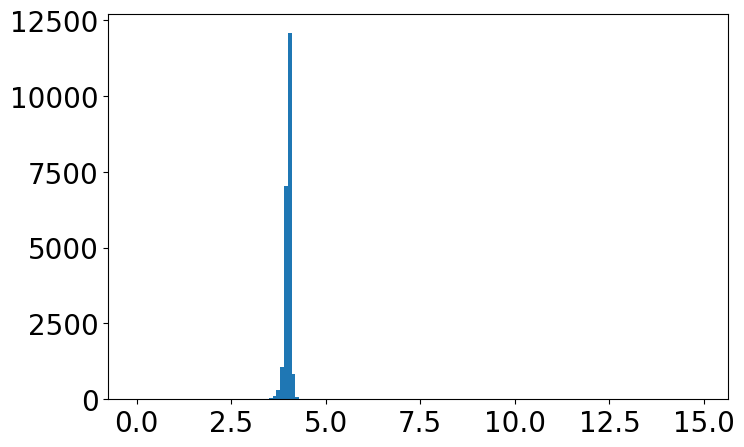

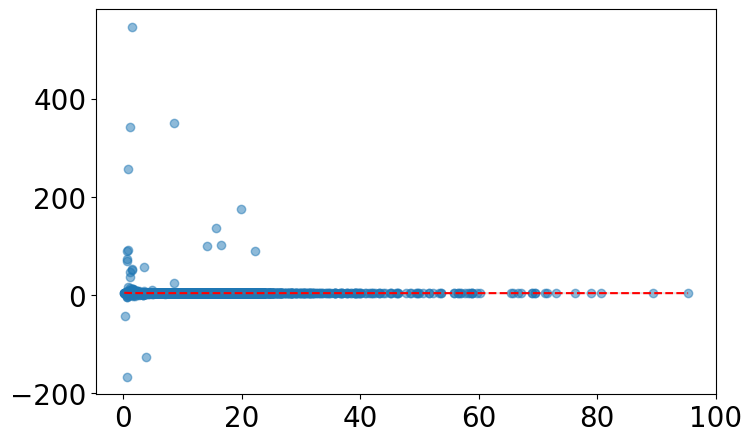

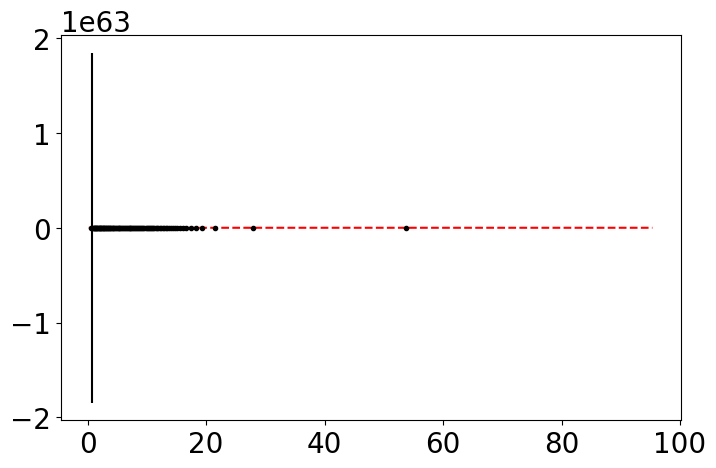

In [28]:
time_col = 'tfit20_nb'

mm_basic_charge_cut = (0.2 < df['peakparam_C4/peakparam_C4.totcharge_filtered']) & (df['peakparam_C4/peakparam_C4.totcharge_filtered'] < 100)
mcp_basic_charge_cut = (0 < df['peakparam_C1/peakparam_C1.charge_filtered']) & (df['peakparam_C1/peakparam_C1.charge_filtered'] < 2)

good_mm_mcp_charge_events = mm_basic_charge_cut & mcp_basic_charge_cut

mm_ts = df[f'peakparam_C4/peakparam_C4.{time_col}'][good_mm_mcp_charge_events]
mcp_ts = df[f'peakparam_C1/peakparam_C1.{time_col}'][good_mm_mcp_charge_events]
charges = df['peakparam_C4/peakparam_C4.totcharge_filtered'][good_mm_mcp_charge_events]
time_diff = mm_ts - mcp_ts

time_walk_func = time_walk_double_exponential
p0 = [1, -1, 1, -1, 4]

indiv_params, med_bins_params, gaus_bins_params = get_time_walk_parameterization(time_diff, charges, time_walk_func, p0, plot=True)

In [29]:
r_inner = 4.3
r_outer = hex_radius_inner_to_outer(r_inner)
xs = df['hitX_C4'][good_mm_mcp_charge_events]
ys = df['hitY_C4'][good_mm_mcp_charge_events]
rs = np.sqrt((xs - c4_pad_center_measures[0].val)**2 + (ys - c4_pad_center_measures[1].val)**2)

time_diff_charge_na_filter = ~pd.isna(time_diff) & ~pd.isna(charges)

rs = rs[time_diff_charge_na_filter]
xs = xs[time_diff_charge_na_filter]
ys = ys[time_diff_charge_na_filter]

time_diff = time_diff[time_diff_charge_na_filter]
charges = charges[time_diff_charge_na_filter]
# Get filter for t_diff > 7.5
large_time_diff_mask = np.abs(time_diff) > 7.5

xs_large_time_diff = xs[large_time_diff_mask]
ys_large_time_diff = ys[large_time_diff_mask]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(xs_large_time_diff, ys_large_time_diff, alpha=0.5, label='Outliers')
ax.scatter(c4_pad_center_measures[0].val, c4_pad_center_measures[1].val,
           color='red', marker='x', s=100, label='Pad Center')

center_x, center_y = c4_pad_center_measures[0].val, c4_pad_center_measures[1].val
inner_circle = patches.Circle((center_x, center_y), r_inner, fill=False, edgecolor='blue', linestyle='dashed', label='Inner Circle')
outer_circle = patches.Circle((center_x, center_y), r_outer, fill=False, edgecolor='green', linestyle='solid', label='Outer Circle')

ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

ax.set_xlim(center_x - r_outer - 1, center_x + r_outer + 1)
ax.set_ylim(center_y - r_outer - 1, center_y + r_outer + 1)

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()


n_event_bins: 217
gaus_bin_hist failed for bin 0.20 pC to 0.697177 pC
28 points in the last bin


/home/dylan/PycharmProjects/pico_py_analysis/single_pad_analysis/test_functions.py:376: RuntimeWarning: overflow encountered in exp
  return a1 * np.exp(l1 * x) + a2 * np.exp(l2 * x) + c
/home/dylan/PycharmProjects/pico_py_analysis/single_pad_analysis/test_functions.py:376: RuntimeWarning: overflow encountered in multiply
  return a1 * np.exp(l1 * x) + a2 * np.exp(l2 * x) + c
/home/dylan/PycharmProjects/sPHENIX_Vernier_Scan_Simulation/venv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:542: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


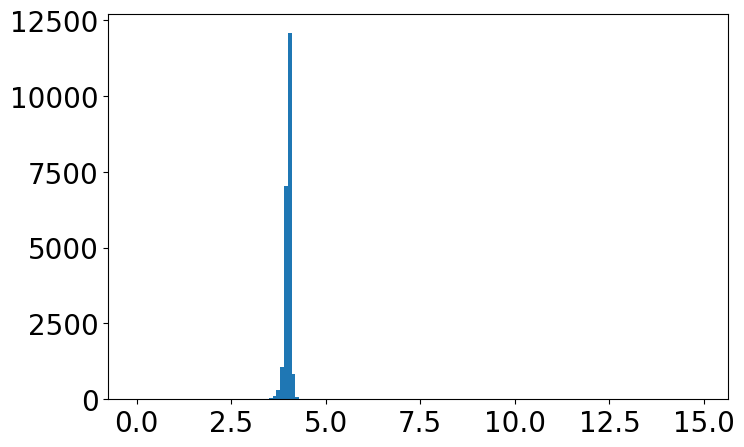

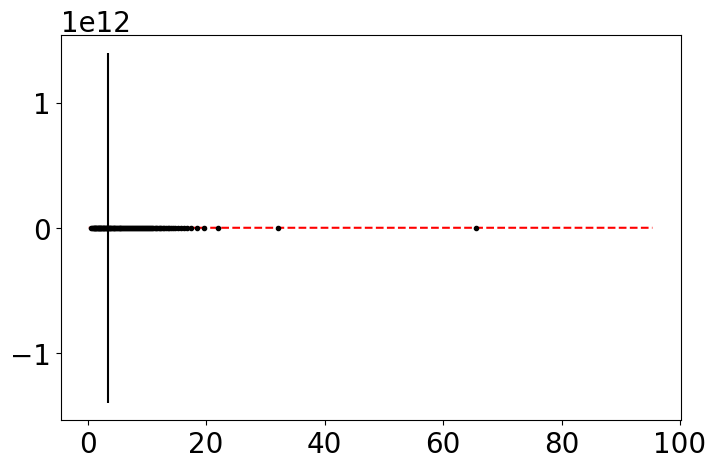

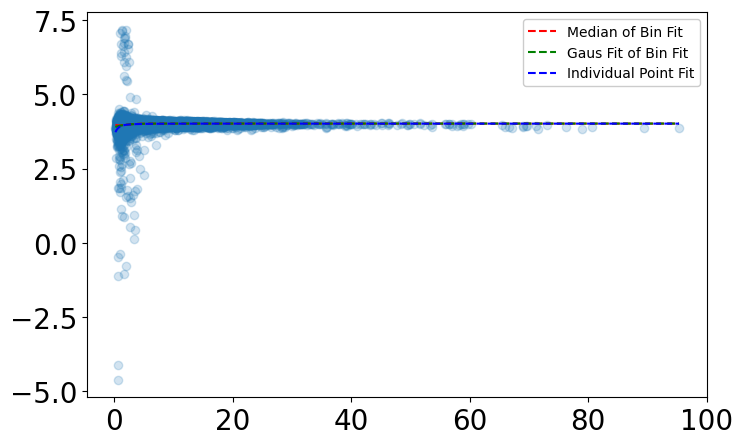

In [30]:
time_diff_filter, charges_filter = time_diff[~large_time_diff_mask], charges[~large_time_diff_mask]
rs_filter = rs[~large_time_diff_mask]
xs_filter = xs[~large_time_diff_mask]
ys_filter = ys[~large_time_diff_mask]
indiv_params, med_bins_params, gaus_bins_params = get_time_walk_parameterization(time_diff_filter, charges_filter, time_walk_func, p0, plot=True)

hitY_C4: [-0.326 ± 0.061, -1.88 ± 0.56, -0.071 ± 0.047, -0.42 ± 0.21, 4.0158 ± 0.0025]
hitY_C4: [19 ± 201820, -1 ± 44, -19 ± 201821, -1 ± 43, 4.01686 ± 0.00036]
hitY_C4: [-0 ± 390, -1 ± 112, -0 ± 390, -1 ± 93, 4.01935 ± 0.00023]


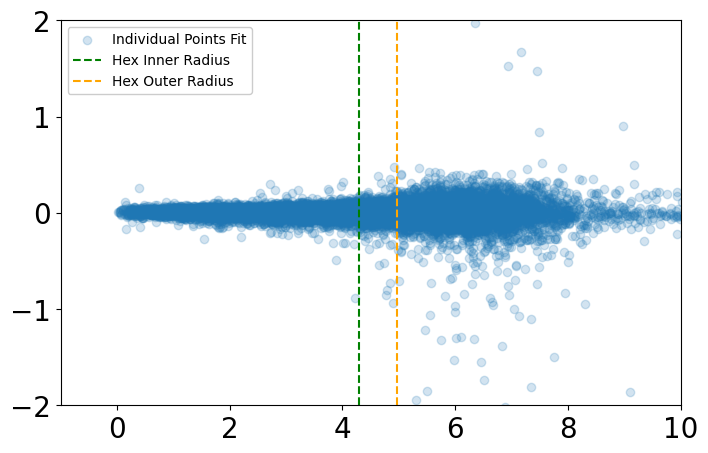

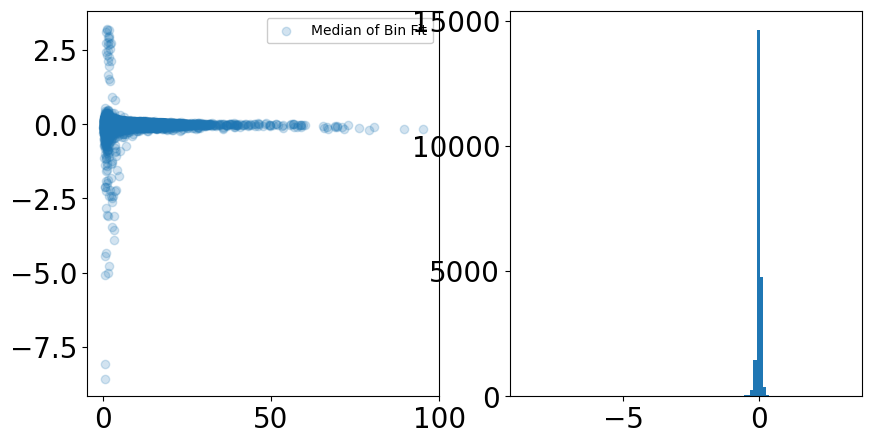

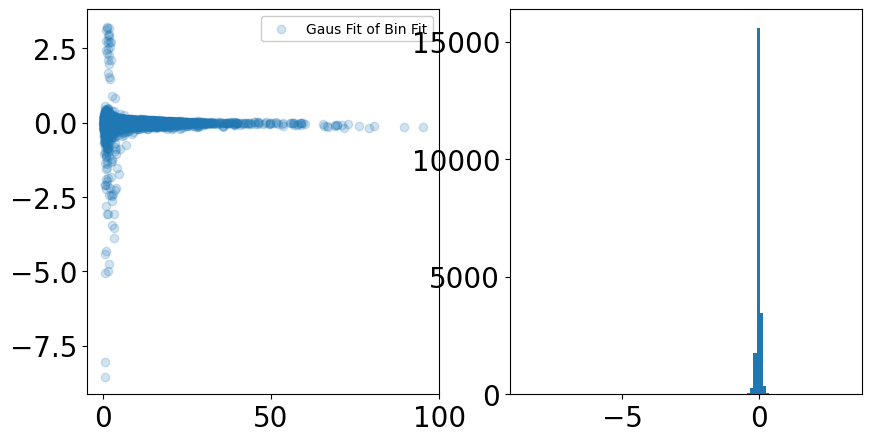

In [31]:
cor_names = ['Individual Points Fit', 'Median of Bin Fit', 'Gaus Fit of Bin Fit']
for cor_meases, cor_name in zip([indiv_params, med_bins_params, gaus_bins_params], cor_names):
    print(f'{col_name}: {cor_meases}')
    cor_popt = [par.val for par in cor_meases]
    time_diff_cor = time_diff_filter - time_walk_func(charges_filter, *cor_popt)

    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
    axs[0].scatter(charges_filter, time_diff_cor, alpha=0.2, label=cor_name)
    axs[1].hist(time_diff_cor, bins=100)
    axs[0].legend()

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(rs_filter, time_diff_cor, alpha=0.2, label=cor_name)
    ax.axvline(r_inner, color='green', ls='--', label='Hex Inner Radius')
    ax.axvline(r_outer, color='orange', ls='--', label='Hex Outer Radius')
    ax.legend()
    ax.set_ylim(-2, 2)
    ax.set_xlim(-1, 10)

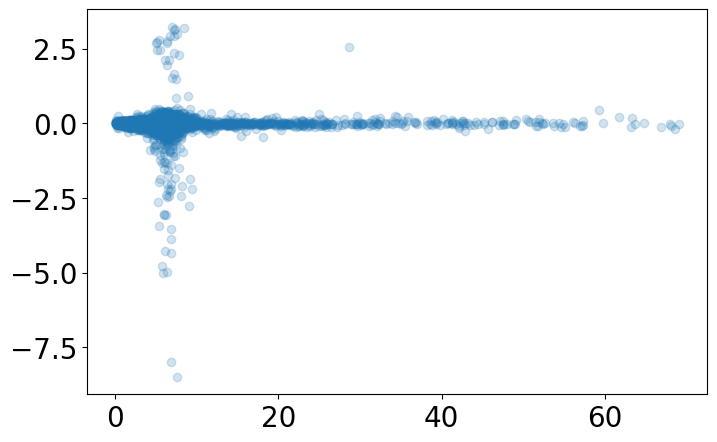

In [32]:
time_diff_cor = time_diff_filter - time_walk_func(charges_filter, *[x.val for x in indiv_params])
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(rs_filter, time_diff_cor, alpha=0.2)

([np.float64(0.25),
  np.float64(0.75),
  np.float64(1.25),
  np.float64(1.75),
  np.float64(2.25),
  np.float64(2.75),
  np.float64(3.25),
  np.float64(3.75),
  np.float64(4.25),
  np.float64(4.75),
  np.float64(5.25),
  np.float64(5.75),
  np.float64(6.25),
  np.float64(6.75),
  np.float64(7.25),
  np.float64(7.75)],
 [26.8 ± 2.9,
  24.0 ± 1.7,
  25.5 ± 1.3,
  28.6 ± 1.0,
  29.3 ± 1.1,
  30.88 ± 0.93,
  33.49 ± 0.90,
  36.4 ± 1.0,
  40.7 ± 1.0,
  49.6 ± 1.2,
  60.5 ± 1.3,
  73.0 ± 2.1,
  82.4 ± 2.5,
  104.1 ± 3.5,
  100.4 ± 5.5,
  102.4 ± 8.4],
 [7.0 ± 2.7,
  6.8 ± 1.6,
  7.1 ± 1.3,
  6.5 ± 1.0,
  6.3 ± 1.1,
  3.94 ± 0.92,
  3.23 ± 0.89,
  3.27 ± 0.98,
  2.0 ± 1.0,
  4.2 ± 1.2,
  6.6 ± 1.3,
  8.8 ± 2.1,
  3.8 ± 2.5,
  4.3 ± 3.5,
  11.3 ± 5.4,
  -2.0 ± 8.4])

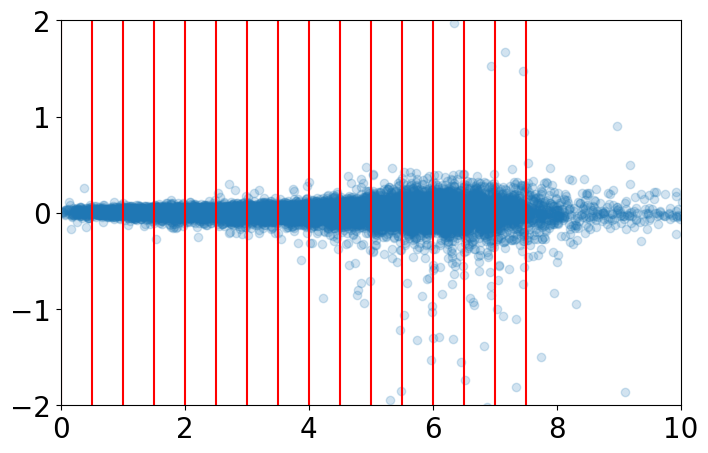

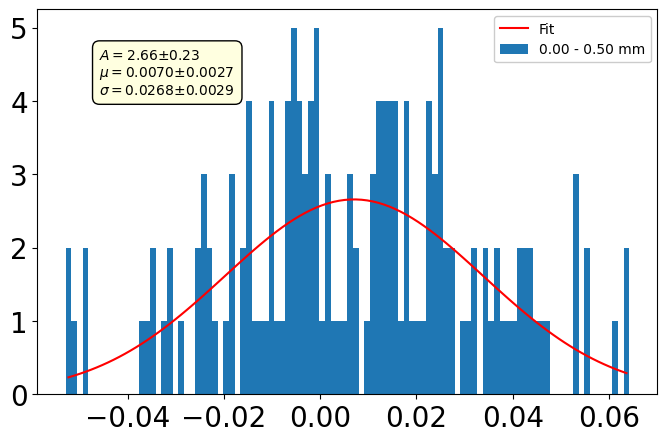

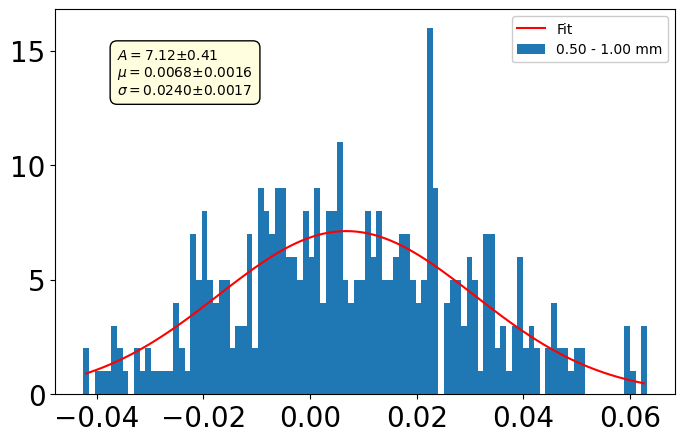

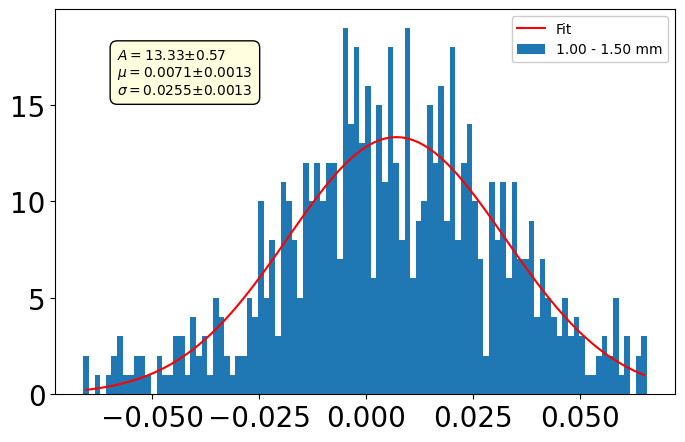

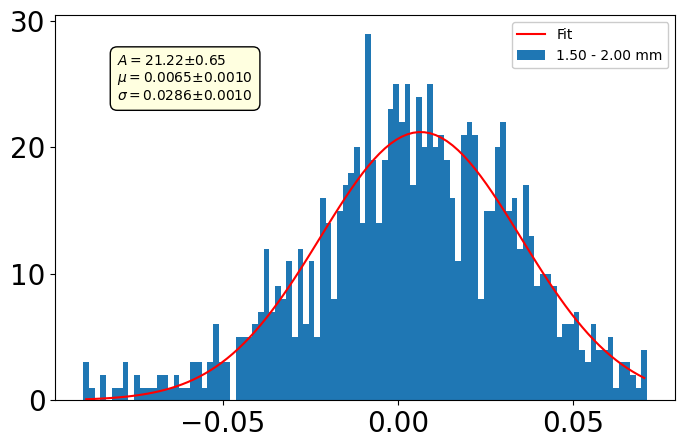

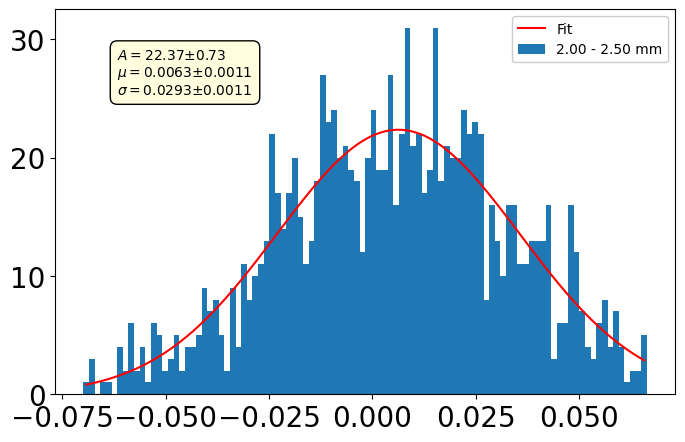

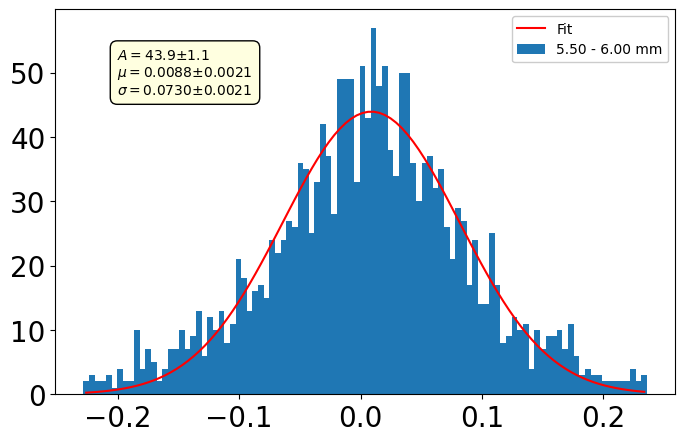

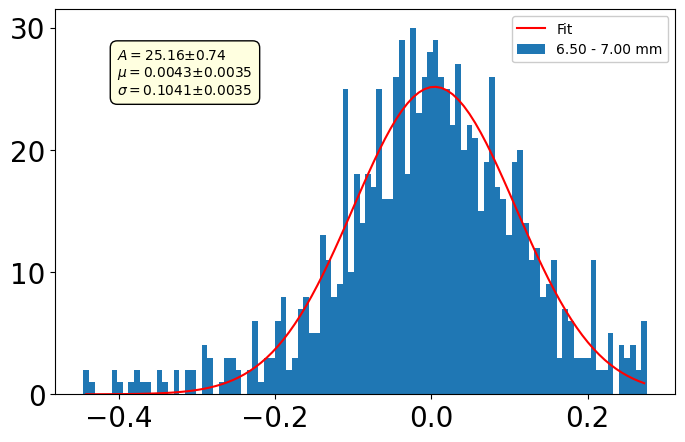

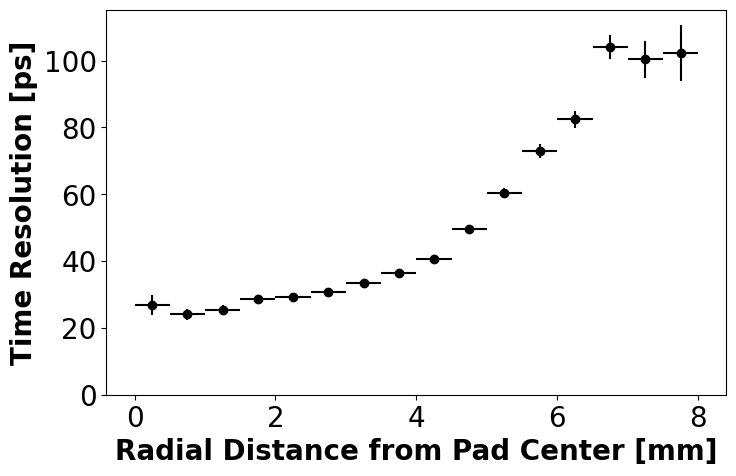

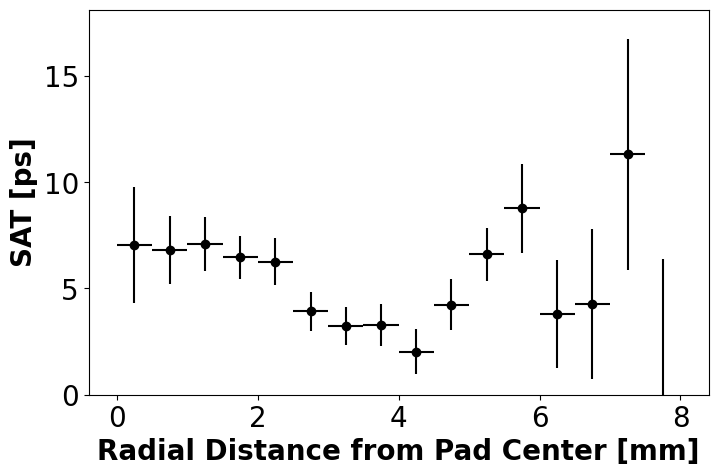

In [33]:
r_bin_width = 0.5
r_bin_edges = np.arange(0, 8, r_bin_width)
get_ring_scan(time_diff_cor, r_bin_edges, r_bin_width, rs_filter, percentile_cuts=(2,98), plot=True)

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(rs_filter, charges_filter, alpha=0.2)
ax.axhline(0, color='gray', zorder=0)
ax.axvline(r_inner, color='green', zorder=10)
ax.axvline(r_outer, color='orange', zorder=10)
ax.set_xlim(-1, 10)

(-1.0, 10.0)

In [35]:
scan_radius = 1.0  # mm Radius of scanning circle
min_events_per_circle = 150  # Minimum number of events per scan circle. If less, skip the step
xs = np.arange(20, 40, 0.5)
y = 26
xy_pairs = [(x, y) for x in xs]
scan_resolutions, scan_means, events = get_circle_scan(time_diff_cor, xs_filter, ys_filter, xy_pairs, radius=scan_radius, min_events=min_events_per_circle, ns_to_ps=True, percentile_cuts=(2, 98), plot=False)

Circle Scan: (20.0, 26)
Circle Scan: (20.5, 26)
Circle Scan: (21.0, 26)
Circle Scan: (21.5, 26)
Circle Scan: (22.0, 26)
Circle Scan: (22.5, 26)
Circle Scan: (23.0, 26)
Circle Scan: (23.5, 26)
Circle Scan: (24.0, 26)
Circle Scan: (24.5, 26)
Circle Scan: (25.0, 26)
Circle Scan: (25.5, 26)
Circle Scan: (26.0, 26)
Circle Scan: (26.5, 26)
Circle Scan: (27.0, 26)
Circle Scan: (27.5, 26)
Circle Scan: (28.0, 26)
Circle Scan: (28.5, 26)
Circle Scan: (29.0, 26)
Circle Scan: (29.5, 26)
Circle Scan: (30.0, 26)
Circle Scan: (30.5, 26)
Circle Scan: (31.0, 26)
Circle Scan: (31.5, 26)
Circle Scan: (32.0, 26)
Circle Scan: (32.5, 26)
Circle Scan: (33.0, 26)
Circle Scan: (33.5, 26)
Circle Scan: (34.0, 26)
Circle Scan: (34.5, 26)
Circle Scan: (35.0, 26)
Circle Scan: (35.5, 26)
Circle Scan: (36.0, 26)
Circle Scan: (36.5, 26)
Circle Scan: (37.0, 26)
Circle Scan: (37.5, 26)
Circle Scan: (38.0, 26)
Circle Scan: (38.5, 26)
Circle Scan: (39.0, 26)
Circle Scan: (39.5, 26)


Text(0, 0.5, 'Time Difference Mean [ps]')

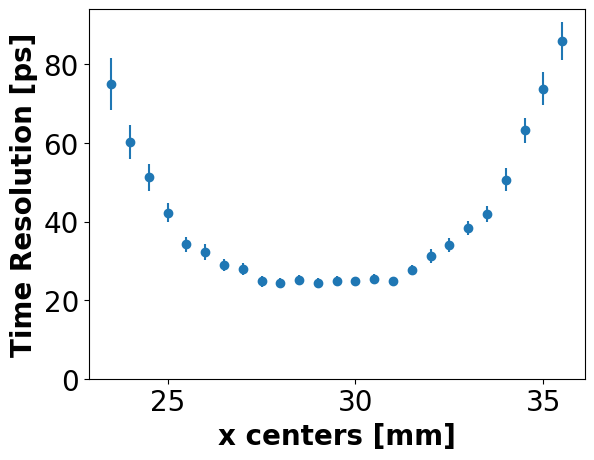

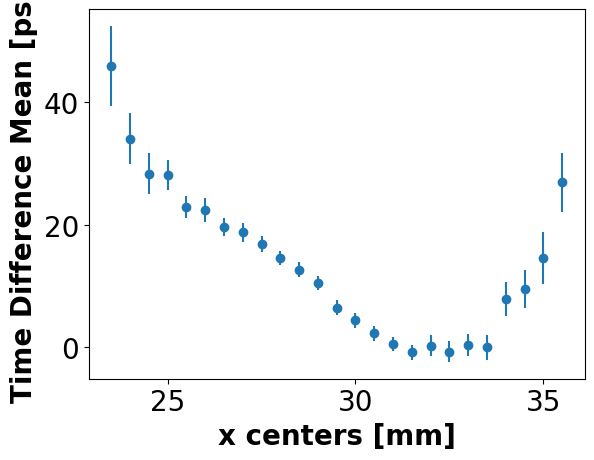

In [36]:
fig, ax = plt.subplots()
xs = [x for x, y in xy_pairs]
res_vals, res_errs = zip(*[(meas.val, meas.err) for meas in scan_resolutions])
res_vals, res_errs = np.array(res_vals), np.array(res_errs)
ax.errorbar(xs, res_vals, yerr=res_errs, ls='none', marker='o')
ax.set_xlabel('x centers [mm]')
ax.set_ylabel('Time Resolution [ps]')
ax.set_ylim(bottom=0)

fig, ax = plt.subplots()
mean_vals, mean_errs = zip(*[(meas.val, meas.err) for meas in scan_means])
mean_vals, mean_errs = np.array(mean_vals), np.array(mean_errs)
ax.errorbar(xs, mean_vals, yerr=mean_errs, ls='none', marker='o')
ax.set_xlabel('x centers [mm]')
ax.set_ylabel('Time Difference Mean [ps]')

Circle Scan: (20.0, 20.0)
Circle Scan: (20.5, 20.0)
Circle Scan: (21.0, 20.0)
Circle Scan: (21.5, 20.0)
Circle Scan: (22.0, 20.0)
Circle Scan: (22.5, 20.0)
Circle Scan: (23.0, 20.0)
Circle Scan: (23.5, 20.0)
Circle Scan: (24.0, 20.0)
Circle Scan: (24.5, 20.0)
Circle Scan: (25.0, 20.0)
Circle Scan: (25.5, 20.0)
Circle Scan: (26.0, 20.0)
Circle Scan: (26.5, 20.0)
Circle Scan: (27.0, 20.0)
Circle Scan: (27.5, 20.0)
Circle Scan: (28.0, 20.0)
Circle Scan: (28.5, 20.0)
Circle Scan: (29.0, 20.0)
Circle Scan: (29.5, 20.0)
Circle Scan: (30.0, 20.0)
Circle Scan: (30.5, 20.0)
Circle Scan: (31.0, 20.0)
Circle Scan: (31.5, 20.0)
Circle Scan: (32.0, 20.0)
Circle Scan: (32.5, 20.0)
Circle Scan: (33.0, 20.0)
Circle Scan: (33.5, 20.0)
Circle Scan: (34.0, 20.0)
Circle Scan: (34.5, 20.0)
Circle Scan: (35.0, 20.0)
Circle Scan: (35.5, 20.0)
Circle Scan: (36.0, 20.0)
Circle Scan: (36.5, 20.0)
Circle Scan: (37.0, 20.0)
Circle Scan: (37.5, 20.0)
Circle Scan: (38.0, 20.0)
Circle Scan: (38.5, 20.0)
Circle Scan:

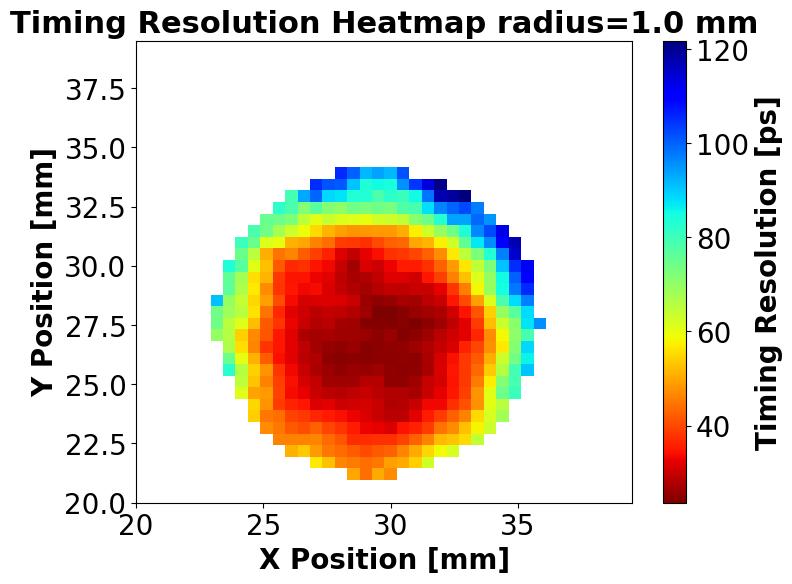

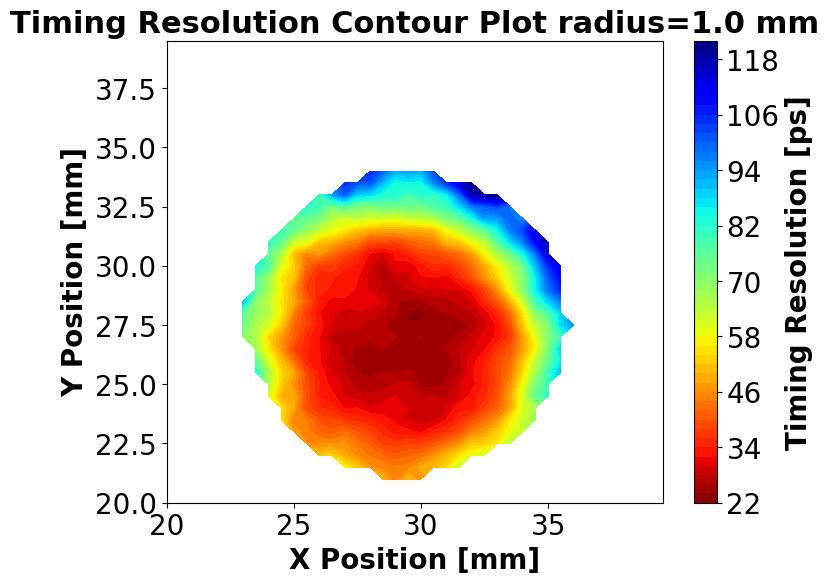

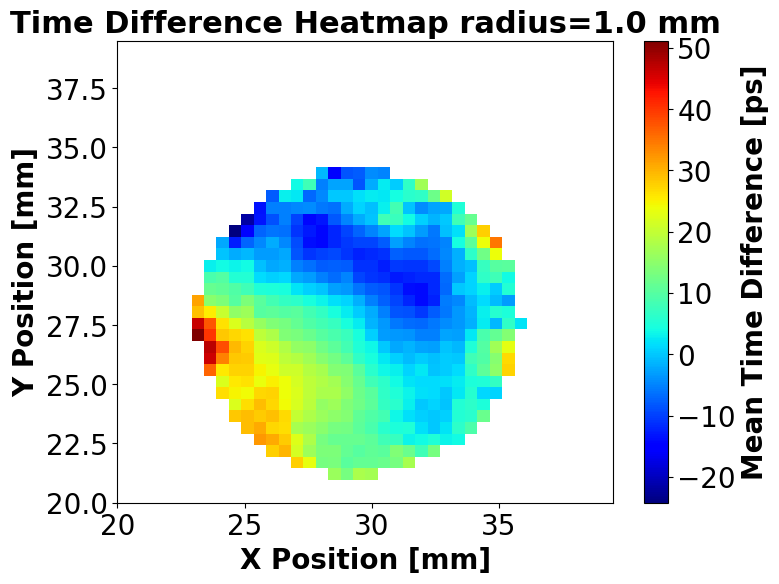

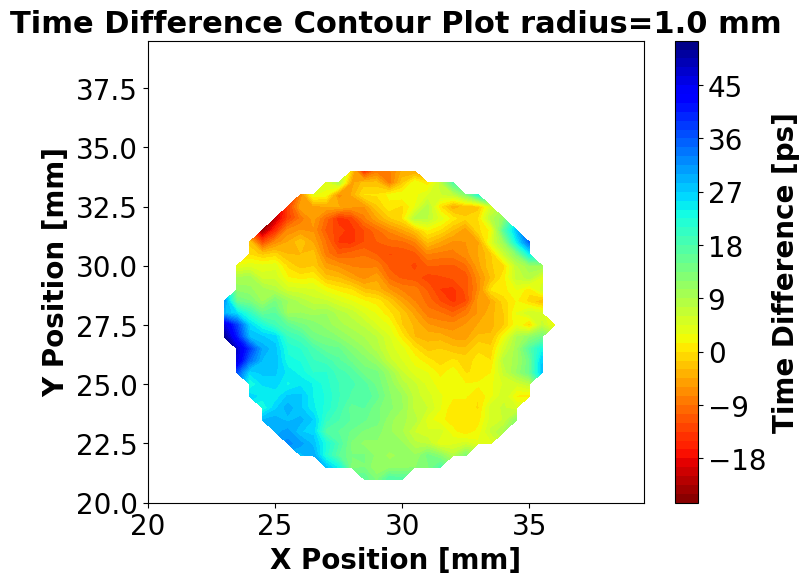

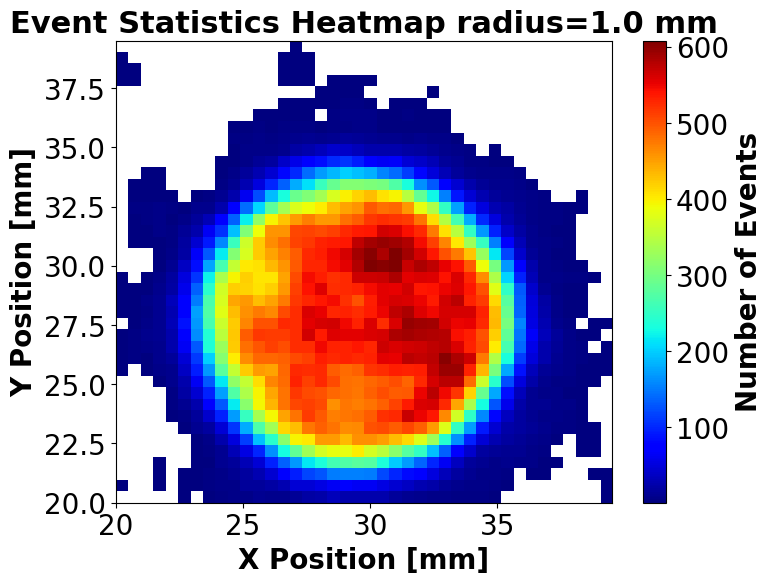

In [37]:

# Define scan ranges
scan_xs = np.arange(20, 40, 0.5)
scan_ys = np.arange(20, 40, 0.5)  # Define y range

# Generate mesh grid
x_mesh, y_mesh = np.meshgrid(scan_xs, scan_ys)
xy_pairs = list(zip(x_mesh.ravel(), y_mesh.ravel()))  # Flatten to list of (x, y) pairs

# Perform scan
# scan_resolutions, scan_means, events = get_circle_scan(df, xy_pairs, 'C4', radius=scan_radius, time_diff_lims=(0, 10),
#                                                        min_events=min_events_per_circle, ns_to_ps=True, plot=False)

scan_resolutions, scan_means, events = get_circle_scan(time_diff_cor, xs_filter, ys_filter, xy_pairs, radius=scan_radius, min_events=min_events_per_circle, ns_to_ps=True, percentile_cuts=(2, 98), plot=False)

plot_2D_circle_scan(scan_resolutions, scan_means, scan_xs, scan_ys, scan_events=events, radius=scan_radius)
